In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)

In [43]:


# # 生成 20 个股票代码
# rics = [f'{str(i).zfill(4)}.HK' for i in range(1, 20)]

# # 生成日期范围
# dates = pd.date_range(start='2022-12-01', end='2022-12-30').strftime('%Y-%m-%d')

# # 生成时间范围
# times = np.linspace(34200.0000, 42600.0000, 1400)

# # 生成特征列名
# columns = ['s1_a1_down_b1_down', 's1_a1_rise_amt_d_all', 's1_a1_up_b1_down', 's1_amt_ms', 's1_ask3_amt_pct',
#            's1_ask_pct', 's1_ave_ab_diff', 's1_b10da10_mean', 's1_b1_down_amt_d_all', 's1_bda1_rdd_amt',
#            's1_bda_med', 's1_bdatn_med', 's1_bid_p_std', 's1_bma_3_pct', 's1_bma_chg', 's1_corr_pt', 's1_corr_pv',
#            's1_dtb_d_a_std', 's1_dtb_d_amt', 's1_hl_t_diff', 's1_mid_up_mid3_v', 's1_near_btd_rate',
#            's1_px_chg_abs_sum', 's1_px_chg_skew', 's1_px_chg_std', 's1_px_up_ma5', 's1_rise_vwap', 's1_ta_d_a',
#            's1_vdt', 's1_vwap_up_lastmid', 's1_vwap_up_mid', 's1_vwap_up_mid3_v', 's5_a1_rise_amt_d_all',
#            's5_amt_compare', 's5_amt_max_pct', 's5_a_sk3_amt_pct', 's5_ask_10d3_d1', 's5_ask_10d3_max',
#            's5_b10da10_mean', 's5_b1d10_up_ask10_down', 's5_bid_p_std', 's5_hl1_d4', 's5_high2last',
#            's5_last_avea_corr', 's5_low2last', 's5_max5_rise_sum', 's5_mid_up_mid3_v', 's5_near_btd3_rate',
#            's5_near_btd_rate', 's5_pct_chg_max', 's5_pct_ud', 's5_px_chg_abs_sum', 's5_px_chg_skew', 's5_px_chg_std',
#            's5_rise_vwap', 's5_rise_wap', 's5_rise_wapd_ms', 's5_v2hl_std', 's5_v5vdv', 's5_vol_d_ab10_diff',
#            's5_vol_d_corr', 's5_vw_pct', 's5_vw_px_vwap_diff', 's5_vwap_1d5', 's5_warm_rise', 's_ask_pct',
#            's_b1_down_amt_d_all', 's_bda1_rdd_amt_rate', 's_bid3_amt_pct', 's_bma_3_pct', 's_cavity',
#            's_et_rd_num_diff', 's_high2last', 's_high_when', 's_hspread_rise', 's_low2last', 's_low_when',
#            's_max_draw', 's_mid_up_mid3_v', 's_price2b', 's_price2wap', 's_price2wap_mean', 's_real_pct',
#            's_spread_1d5', 's_std_ud', 's_trigger_time', 's_vexity', 's_vw_av_pct_diff', 's_vw_pct',
#            's_vw_px_vwap_diff', 's_vwap_up_lastmid3_v', 's_vwap_up_mid', 's_vwap_up_mid3', '600','1800','3600','EOD','1800_.HSI','EOD_.HSI']

# index = pd.MultiIndex.from_product([rics, dates, times], names=['RIC', 'DATE', 'TIME'])

# data = np.random.randn(len(index), len(columns))

# # 创建 DataFrame
# df = pd.DataFrame(data, index=index, columns=columns)

# df.to_parquet('./table_df.parquet')


# import pandas as pd
# import numpy as np

# # 生成日期范围
# dates = pd.date_range(start='2022-12-01', end='2022-12-30')

# # 生成股票代码列表
# rics = [f'{str(i).zfill(4)}.HK' for i in range(1, 20)]

# data = []
# for date in dates:
#     # 每天随机选择 5 个股票代码
#     selected_rics = np.random.choice(rics, 5, replace=False)
#     # 生成权重，确保权重总和为 1
#     weights = np.random.rand(5)
#     weights = weights / weights.sum()
#     for ric, weight in zip(selected_rics, weights):
#         data.append([ric, date.strftime('%Y-%m-%d'), weight])

# # 创建 DataFrame
# constitute = pd.DataFrame(data, columns=['RIC', 'DATE', 'WEIGHT'])

# constitute.to_parquet('./constitute.parquet')

In [9]:
class table:
    df = pd.read_parquet('./table_df.parquet')
constitute =  pd.read_parquet('./constitute.parquet')

In [10]:
## masked_df
constitute_df = table.df.reset_index('TIME').merge(constitute.set_index(['RIC','DATE'])[['WEIGHT']], left_index=True, right_index = True, how='right').reset_index().set_index(['RIC','DATE','TIME'])

In [4]:
constitute_df

s1_a1_down_b1_down  s1_a1_rise_amt_d_all  \
RIC     DATE       TIME                                                     
0001.HK 2022-12-01 34200.000000           -1.437633             -1.477992   
                   34206.004289           -0.412984              0.018291   
                   34212.008578            0.034275             -1.154977   
                   34218.012866           -1.643428              0.994393   
                   34224.017155           -0.511854             -0.728501   
...                                             ...                   ...   
0019.HK 2022-12-21 42575.982845            0.850183              0.413232   
                   42581.987134           -0.168204              0.397055   
                   42587.991422           -0.731460             -0.344679   
                   42593.995711            0.675802              0.618723   
                   42600.000000           -0.148681              1.097862   

                                 s1_a1_up_b1_down  s1_amt_ms  s1_ask3_amt_pct  \
RIC     DATE       TIME                                                         
0001.HK 2022-12-01 34200.000000         -0.142993  -0.324327        -0.621037   
                   34206.004289         -0.514871  -0.908422         0.157040   
                   34212.008578          1.477043  -0.665026        -0.076069   
                   34218.012866          0.787506  -0.099644        -1.131064   
                   34224.017155         -0.525268   0.055444        -1.423639   
...                                           ...        ...              ...   
0019.HK 2022-12-21 42575.982845          0.160715  -0.572052        -0.230675   
                   42581.987134         -1.101628  -1.916499        -0.513137   
                   42587.991422         -0.854257   0.415976         0.792323   
                   42593.995711          0.772866   0.452182         2.086642   
                   42600.000000         -1.798805  -0.840091        -0.053813   

                                 s1_ask_pct  s1_ave_ab_diff  s1_b10da10_mean  \
RIC     DATE       TIME                                                        
0001.HK 2022-12-01 34200.000000   -3.431306        1.075908        -1.340280   
                   34206.004289    0.794000       -1.940619         1.215019   
                   34212.008578    0.410614       -1.784547        -1.060698   
                   34218.012866    0.069560        1.791746         0.706005   
                   34224.017155    1.821501       -0.680137         1.843371   
...                                     ...             ...              ...   
0019.HK 2022-12-21 42575.982845   -0.733400        0.087445         0.182963   
                   42581.987134    0.733068       -1.002311        -0.145453   
                   42587.991422    0.442257       -0.963900         1.450853   
                   42593.995711    2.091885        0.785566        -1.380564   
                   42600.000000    0.522029       -0.319494        -1.082792   

                                 s1_b1_down_amt_d_all  s1_bda1_rdd_amt  ...  \
RIC     DATE       TIME                                                 ...   
0001.HK 2022-12-01 34200.000000              1.104185        -0.115655  ...   
                   34206.004289              0.804380        -0.846513  ...   
                   34212.008578              1.293413        -1.396198  ...   
                   34218.012866             -0.145423         0.383010  ...   
                   34224.017155             -0.916931         0.466797  ...   
...                                               ...              ...  ...   
0019.HK 2022-12-21 42575.982845              0.914335         0.952526  ...   
                   42581.987134             -0.227171        -1.370878  ...   
                   42587.991422             -0.336063         1.035157  ...   
                   42593.995711              0.462573         0.679

In [107]:


import pandas as pd
import numpy as np
from lightgbm import early_stopping, LGBMRegressor as LGBMR 
import multiprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from datetime import datetime


def tree_train_basic(factor_all_df, features=None, target_str=None, pred_name=None):
    factor_all_df['DATETIME'] = pd.to_datetime(factor_all_df['DATE'], format='%Y-%m-%d')

    if features is None: 
        features = ['s1_a1_down_b1_down', 's1_a1_rise_amt_d_all', 's1_a1_up_b1_down', 's1_amt_ms', 's1_ask3_amt_pct',
                   's1_ask_pct', 's1_ave_ab_diff', 's1_b10da10_mean', 's1_b1_down_amt_d_all', 's1_bda1_rdd_amt',
                   's1_bda_med', 's1_bdatn_med', 's1_bid_p_std', 's1_bma_3_pct', 's1_bma_chg', 's1_corr_pt', 's1_corr_pv',
                   's1_dtb_d_a_std', 's1_dtb_d_amt', 's1_hl_t_diff', 's1_mid_up_mid3_v', 's1_near_btd_rate',
                   's1_px_chg_abs_sum', 's1_px_chg_skew', 's1_px_chg_std', 's1_px_up_ma5', 's1_rise_vwap', 's1_ta_d_a',
                   's1_vdt', 's1_vwap_up_lastmid', 's1_vwap_up_mid', 's1_vwap_up_mid3_v', 's5_a1_rise_amt_d_all',
                   's5_amt_compare', 's5_amt_max_pct', 's5_a_sk3_amt_pct', 's5_ask_10d3_d1', 's5_ask_10d3_max',
                   's5_b10da10_mean', 's5_b1d10_up_ask10_down', 's5_bid_p_std', 's5_hl1_d4', 's5_high2last',
                   's5_last_avea_corr', 's5_low2last', 's5_max5_rise_sum', 's5_mid_up_mid3_v', 's5_near_btd3_rate',
                   's5_near_btd_rate', 's5_pct_chg_max', 's5_pct_ud', 's5_px_chg_abs_sum', 's5_px_chg_skew', 's5_px_chg_std',
                   's5_rise_vwap', 's5_rise_wap', 's5_rise_wapd_ms', 's5_v2hl_std', 's5_v5vdv', 's5_vol_d_ab10_diff',
                   's5_vol_d_corr', 's5_vw_pct', 's5_vw_px_vwap_diff', 's5_vwap_1d5', 's5_warm_rise', 's_ask_pct',
                   's_b1_down_amt_d_all', 's_bda1_rdd_amt_rate', 's_bid3_amt_pct', 's_bma_3_pct', 's_cavity',
                   's_et_rd_num_diff', 's_high2last', 's_high_when', 's_hspread_rise', 's_low2last', 's_low_when',
                   's_max_draw', 's_mid_up_mid3_v', 's_price2b', 's_price2wap', 's_price2wap_mean', 's_real_pct',
                   's_spread_1d5', 's_std_ud', 's_trigger_time', 's_vexity', 's_vw_av_pct_diff', 's_vw_pct',
                   's_vw_px_vwap_diff', 's_vwap_up_lastmid3_v', 's_vwap_up_mid', 's_vwap_up_mid3'] 

    factor_all_df['target'] =  (factor_all_df[target_str]) if target_str is not None else (factor_all_df['1800'])
    
    pred_name = 'y_pred' if pred_name is None else pred_name
    # # 划分训练集和测试集
    train_start = datetime(2022, 12, 1)
    train_end = datetime(2022, 12, 20)
    test_start = datetime(2022, 12, 20) 
    test_end = datetime(2022, 12, 31)



    train_df = factor_all_df[(factor_all_df['DATETIME'] >= train_start) & (factor_all_df['DATETIME'] < train_end)]
    test_df = factor_all_df[(factor_all_df['DATETIME'] >= test_start) & (factor_all_df['DATETIME'] < test_end)]

    X_train = train_df[features]
    y_train_open = train_df['target']

    X_test = test_df[features]
    y_test_open = test_df['target']

    # 训练 XGBoost 模型（更完整的参数设置）
    def train_xgb(X_train, y_train, X_test, y_test):
        model = LGBMR(
            **{'device'            : "cpu",
                'objective'         : 'mse',
                'boosting_type'     : 'gbdt',
                'random_state'      : 42,
                'colsample_bytree'  : 0.7,
                'subsample'         : 0.85,
                'learning_rate'     : 0.1,
                # 'max_depth'         : 5,
                'n_estimators'      : 650,
                'num_leaves'        : 32,
                'reg_alpha'         : 0.8,
                'reg_lambda'        : 0.01,
                'n_jobs'            : multiprocessing.cpu_count() // 2,
               }
        )

        # 训练模型
        model.fit(X_train, y_train, verbose=True) # , eval_set=[(X_test, y_test)], early_stopping_rounds=55

        # 预测
        y_pred_train, y_pred_test = model.predict(X_train), model.predict(X_test)

        # 计算准确率
        acc = accuracy_score(y_test>0, y_pred_test>0)
        print(f"Model Accuracy: {acc:.4f}")

        return model, y_pred_train, y_pred_test

    # 训练 return_open 模型
    model_open, pred_open_train, pred_open_test = train_xgb(X_train, y_train_open, X_test, y_test_open)

    # 在测试集上应用预测结果
    train_df[pred_name] = (pred_open_train)
    test_df[pred_name]  = (pred_open_test)
    
    return test_df, train_df
    # # 合并回 factor_all_df
    # factor_all_df = factor_all_df.merge(pd.concat((train_df, test_df),  ignore_index=True)[['RIC', 'DATE', 'TIME', 'y_pred']], on=['RIC', 'DATE', 'TIME'], how='left')




In [43]:

def plot_fr_col(test_df, feat_col = None, ret_cols=None, time_points= None):
    # 假设你已经有以下变量
    feat_col = 'y_pred' if feat_col is None else feat_col
    ret_cols = ['1800', 'EOD'] if ret_cols is None else ret_cols
    time_points = [36745, 40198] if time_points is None else time_points

    test_df['TIMEINT'] = test_df['TIME'].astype(int)
    df = test_df
    

    # ---------- 全部时间点 (FR_all_*) ----------
    fr_all_results = {}
    for ret_col in ret_cols:
        sub_df = df[[feat_col, ret_col, 'DATETIME']].dropna()

        # 按date groupby，计算 FR = cov(x, y) / std(x)
        grouped = sub_df.groupby('DATETIME')
        mean_x = grouped[feat_col].transform('mean')
        mean_y = grouped[ret_col].transform('mean')
        std_x = grouped[feat_col].transform('std')

        cov_xy = ((sub_df[feat_col] - mean_x) * (sub_df[ret_col] - mean_y)).groupby(sub_df['DATETIME']).mean()
        std_x_daily = std_x.groupby(sub_df['DATETIME']).first()  # std(x)是一样的，随便取一个就行

        fr = cov_xy / std_x_daily.replace(0, np.nan)
        fr_all_results[f'FR_all_{ret_col}'] = fr

    # ---------- 特定时间点 (FR_{time}_{ret_col}) ----------
    fr_time_results = {}

    for tp in time_points:
        df_tp = df[df['TIMEINT'] == tp].dropna(subset=[feat_col] + ret_cols)
        for ret_col in ret_cols:
            grouped = df_tp.groupby('DATETIME')
            x = df_tp[feat_col]
            y = df_tp[ret_col]
            mean_x = grouped[feat_col].transform('mean')
            mean_y = grouped[ret_col].transform('mean')
            std_x = grouped[feat_col].transform('std')

            cov_xy = ((x - mean_x) * (y - mean_y)).groupby(df_tp['DATETIME']).mean()
            std_x_daily = std_x.groupby(df_tp['DATETIME']).first()

            fr = cov_xy / std_x_daily.replace(0, np.nan)
            fr_time_results[f'FR_{tp}_{ret_col}'] = fr

    # 合并所有结果
    fr_all_df = pd.DataFrame(fr_all_results)
    fr_time_df = pd.DataFrame(fr_time_results)
    fr_df = pd.concat([fr_all_df, fr_time_df], axis=1)

    # 计算 cumulative FR
    cumulative_fr_df = fr_df.cumsum()


    # 分别提取 ret0e 和 ret1h 的 FR 列
    fr_0e_cols = [col for col in cumulative_fr_df.columns if ret_cols[0] in col]
    fr_1h_cols = [col for col in cumulative_fr_df.columns if ret_cols[1] in col]

    # 画 ret0e_shift 的 Cumulative FR 图
    plt.figure(figsize=(16, 6))
    for col in fr_0e_cols:
        plt.plot(cumulative_fr_df.index, cumulative_fr_df[col], label=col)

    plt.title(f'{feat_col} Cumulative FR ({ret_cols[0]})')
    plt.xlabel('Date')
    plt.ylabel('Cumulative FR')
    plt.legend()
    plt.grid(True)
    plt.xticks(cumulative_fr_df.index[::10], rotation=45)
    plt.tight_layout()
    plt.show()

    # 画 ret1h_shift 的 Cumulative FR 图
    plt.figure(figsize=(16, 6))
    for col in fr_1h_cols:
        plt.plot(cumulative_fr_df.index, cumulative_fr_df[col], label=col)

    plt.title(f'{feat_col} Cumulative FR ({ret_cols[1]})')
    plt.xlabel('Date')
    plt.ylabel('Cumulative FR')
    plt.legend()
    plt.grid(True)
    plt.xticks(cumulative_fr_df.index[::10], rotation=45)
    plt.tight_layout()
    plt.show()
    return cumulative_fr_df
    # fr_df.to_parquet(f'/data/beef3/mike/pshared/GAlpha_custom_build/wensheng_jawN9J/fr_save_old/{feat_col}.parquet', engine="pyarrow", compression="snappy")


In [109]:
test_df, train_df = tree_train_basic(table.df.reset_index())

D:\anaconda\envs\books2\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Model Accuracy: 0.4993


C:\Users\HOMON\AppData\Local\Temp\ipykernel_4940\688315393.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[pred_name] = (pred_open_train)
C:\Users\HOMON\AppData\Local\Temp\ipykernel_4940\688315393.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[pred_name]  = (pred_open_test)


In [ ]:
plot_fr_col(train_df,ret_cols=['1800_.HSI','EOD_.HSI'])

In [ ]:
## 聚类后分别训练再stack

In [2]:


import pandas as pd
import numpy as np
from lightgbm import early_stopping, LGBMRegressor as LGBMR 
import multiprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from datetime import datetime
from sklearn.linear_model import LinearRegression, Ridge

def tree_train_groupstack(factor_all_df, groups, target_str=None, pred_name=None):
    factor_all_df['DATETIME'] = pd.to_datetime(factor_all_df['DATE'], format='%Y-%m-%d')

    factor_all_df['target'] =  (factor_all_df[target_str]) if target_str is not None else (factor_all_df['1800'])
    
    pred_name = 'y_pred' if pred_name is None else pred_name
    # # 划分训练集和测试集
    train_start = datetime(2022, 12, 1)
    train_end = datetime(2022, 12, 20)
    test_start = datetime(2022, 12, 20) 
    test_end = datetime(2022, 12, 31)



    train_df = factor_all_df[(factor_all_df['DATETIME'] >= train_start) & (factor_all_df['DATETIME'] < train_end)]
    test_df = factor_all_df[(factor_all_df['DATETIME'] >= test_start) & (factor_all_df['DATETIME'] < test_end)]

    features_stack = []
    model_grouped = []
    
    
    def train_xgb(X_train, y_train, X_test, y_test):
            model = LGBMR(
                **{'device'            : "cpu",
                    'objective'         : 'mse',
                    'boosting_type'     : 'gbdt',
                    'random_state'      : 42,
                    'colsample_bytree'  : 0.9,
                    'subsample'         : 0.85,
                    'learning_rate'     : 0.1,
                    # 'max_depth'         : 5,
                    'n_estimators'      : 100,
                    'num_leaves'        : 32,
                    'reg_alpha'         : 0.8,
                    'reg_lambda'        : 0.01,
                    'n_jobs'            : multiprocessing.cpu_count() // 2,
                   }
            )

            # 训练模型
            model.fit(X_train, y_train, verbose=True) # , eval_set=[(X_test, y_test)], early_stopping_rounds=55

            # 预测
            y_pred_train, y_pred_test = model.predict(X_train), model.predict(X_test)

            # 计算准确率
            acc = accuracy_score(y_test>0, y_pred_test>0)
            print(f"Model Accuracy: {acc:.4f}")

            return model, y_pred_train, y_pred_test
    for idx, features in enumerate(groups):
        X_train = train_df[features]
        y_train_open = train_df['target']

        X_test = test_df[features]
        y_test_open = test_df['target']

        # 训练 XGBoost 模型（更完整的参数设置）
        

        # 训练 return_open 模型
        model_open, pred_open_train, pred_open_test = train_xgb(X_train, y_train_open, X_test, y_test_open)

        # 在测试集上应用预测结果
        train_df[f'{pred_name}_{idx}'] = (pred_open_train)
        test_df[f'{pred_name}_{idx}']  = (pred_open_test)
        features_stack.append(f'{pred_name}_{idx}')
        model_grouped.append(model_open)
    
    
    

    X_train = train_df[features_stack]
    y_train_open = train_df['target']

    X_test = test_df[features_stack]
    y_test_open = test_df['target']

    # 训练 XGBoost 模型（更完整的参数设置）
    def train_ridge(X_train, y_train, X_test, y_test):
        model = Ridge(fit_intercept=False, alpha=1.0)

        # 训练模型
        model.fit(X_train, y_train) # , eval_set=[(X_test, y_test)], early_stopping_rounds=55

        # 预测
        y_pred_train, y_pred_test = model.predict(X_train), model.predict(X_test)

        # 计算准确率
        acc = accuracy_score(y_test>0, y_pred_test>0)
        print(f"Model Accuracy: {acc:.4f}")

        return model, y_pred_train, y_pred_test

    # 训练 return_open 模型
    model_stack, pred_stack_train, pred_stack_test = train_ridge(X_train, y_train_open, X_test, y_test_open)

    # 在测试集上应用预测结果
    train_df[f'{pred_name}_stack'] = (pred_stack_train)
    test_df[f'{pred_name}_stack']  = (pred_stack_test)


    
    
    
    
    return test_df, train_df, model_stack, model_grouped
    # # 合并回 factor_all_df
    # factor_all_df = factor_all_df.merge(pd.concat((train_df, test_df),  ignore_index=True)[['RIC', 'DATE', 'TIME', 'y_pred']], on=['RIC', 'DATE', 'TIME'], how='left')




ModuleNotFoundError: No module named 'lightgbm'

In [124]:
test_df, train_df, model_stack, model_grouped = tree_train_groupstack(table.df.reset_index(), groups=[['s1_a1_down_b1_down', 's1_a1_rise_amt_d_all', 's1_a1_up_b1_down', 's1_amt_ms', 's1_ask3_amt_pct',
                   's1_ask_pct', 's1_ave_ab_diff', 's1_b10da10_mean', 's1_b1_down_amt_d_all', 's1_bda1_rdd_amt',
                   's1_bda_med', 's1_bdatn_med', 's1_bid_p_std', 's1_bma_3_pct', 's1_bma_chg', 's1_corr_pt', 's1_corr_pv',
                   's1_dtb_d_a_std', 's1_dtb_d_amt', 's1_hl_t_diff', 's1_mid_up_mid3_v', 's1_near_btd_rate',
                   's1_px_chg_abs_sum', 's1_px_chg_skew', 's1_px_chg_std', 's1_px_up_ma5', 's1_rise_vwap'],['s1_ta_d_a',
                   's1_vdt', 's1_vwap_up_lastmid', 's1_vwap_up_mid', 's1_vwap_up_mid3_v', 's5_a1_rise_amt_d_all',
                   's5_amt_compare', 's5_amt_max_pct', 's5_a_sk3_amt_pct', 's5_ask_10d3_d1', 's5_ask_10d3_max',
                   's5_b10da10_mean', 's5_b1d10_up_ask10_down', 's5_bid_p_std', 's5_hl1_d4'],['s5_high2last',
                   's5_last_avea_corr', 's5_low2last', 's5_max5_rise_sum', 's5_mid_up_mid3_v', 's5_near_btd3_rate',
                   's5_near_btd_rate', 's5_pct_chg_max', 's5_pct_ud', 's5_px_chg_abs_sum', 's5_px_chg_skew', 's5_px_chg_std',
                   's5_rise_vwap', 's5_rise_wap', 's5_rise_wapd_ms', 's5_v2hl_std', 's5_v5vdv', 's5_vol_d_ab10_diff',
                   's5_vol_d_corr', 's5_vw_pct', 's5_vw_px_vwap_diff', 's5_vwap_1d5', 's5_warm_rise', 's_ask_pct',
                   's_b1_down_amt_d_all', 's_bda1_rdd_amt_rate', 's_bid3_amt_pct', 's_bma_3_pct', 's_cavity',
                   's_et_rd_num_diff', 's_high2last', 's_high_when', 's_hspread_rise'], ['s_low2last', 's_low_when',
                   's_max_draw', 's_mid_up_mid3_v', 's_price2b', 's_price2wap', 's_price2wap_mean', 's_real_pct',
                   's_spread_1d5', 's_std_ud', 's_trigger_time', 's_vexity', 's_vw_av_pct_diff', 's_vw_pct',
                   's_vw_px_vwap_diff', 's_vwap_up_lastmid3_v', 's_vwap_up_mid', 's_vwap_up_mid3']], pred_name='y_pred_treegroupstack')

D:\anaconda\envs\books2\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Model Accuracy: 0.4997


C:\Users\HOMON\AppData\Local\Temp\ipykernel_4940\2974623595.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[f'{pred_name}_{idx}'] = (pred_open_train)
C:\Users\HOMON\AppData\Local\Temp\ipykernel_4940\2974623595.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[f'{pred_name}_{idx}']  = (pred_open_test)
D:\anaconda\envs\books2\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluatio

Model Accuracy: 0.4995


C:\Users\HOMON\AppData\Local\Temp\ipykernel_4940\2974623595.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[f'{pred_name}_{idx}'] = (pred_open_train)
C:\Users\HOMON\AppData\Local\Temp\ipykernel_4940\2974623595.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[f'{pred_name}_{idx}']  = (pred_open_test)
D:\anaconda\envs\books2\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluatio

Model Accuracy: 0.4991


C:\Users\HOMON\AppData\Local\Temp\ipykernel_4940\2974623595.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[f'{pred_name}_{idx}'] = (pred_open_train)
C:\Users\HOMON\AppData\Local\Temp\ipykernel_4940\2974623595.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[f'{pred_name}_{idx}']  = (pred_open_test)
D:\anaconda\envs\books2\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluatio

Model Accuracy: 0.4999


C:\Users\HOMON\AppData\Local\Temp\ipykernel_4940\2974623595.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[f'{pred_name}_{idx}'] = (pred_open_train)
C:\Users\HOMON\AppData\Local\Temp\ipykernel_4940\2974623595.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[f'{pred_name}_{idx}']  = (pred_open_test)


Model Accuracy: 0.4992


C:\Users\HOMON\AppData\Local\Temp\ipykernel_4940\2974623595.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[f'{pred_name}_stack'] = (pred_stack_train)
C:\Users\HOMON\AppData\Local\Temp\ipykernel_4940\2974623595.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[f'{pred_name}_stack']  = (pred_stack_test)


In [127]:
model_grouped

[LGBMRegressor(colsample_bytree=0.9, device='cpu', n_jobs=8, num_leaves=32,
               objective='mse', random_state=42, reg_alpha=0.8, reg_lambda=0.01,
               subsample=0.85),
 LGBMRegressor(colsample_bytree=0.9, device='cpu', n_jobs=8, num_leaves=32,
               objective='mse', random_state=42, reg_alpha=0.8, reg_lambda=0.01,
               subsample=0.85),
 LGBMRegressor(colsample_bytree=0.9, device='cpu', n_jobs=8, num_leaves=32,
               objective='mse', random_state=42, reg_alpha=0.8, reg_lambda=0.01,
               subsample=0.85),
 LGBMRegressor(colsample_bytree=0.9, device='cpu', n_jobs=8, num_leaves=32,
               objective='mse', random_state=42, reg_alpha=0.8, reg_lambda=0.01,
               subsample=0.85)]

In [ ]:
## 考察low_coverage 影响

In [ ]:
## 筛掉feature_importance==0

In [ ]:
## 聚类后训练进行boosting

In [ ]:


import pandas as pd
import numpy as np
from lightgbm import early_stopping, LGBMRegressor as LGBMR 
import multiprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from datetime import datetime
from sklearn.linear_model import LinearRegression, Ridge

def tree_train_groupstack(factor_all_df, groups, target_str=None, pred_name=None):
    factor_all_df['DATETIME'] = pd.to_datetime(factor_all_df['DATE'], format='%Y-%m-%d')

    factor_all_df['target'] =  (factor_all_df[target_str]) if target_str is not None else (factor_all_df['1800'])
    
    pred_name = 'y_pred' if pred_name is None else pred_name
    # # 划分训练集和测试集
    train_start = datetime(2022, 12, 1)
    train_end = datetime(2022, 12, 20)
    test_start = datetime(2022, 12, 20) 
    test_end = datetime(2022, 12, 31)



    train_df = factor_all_df[(factor_all_df['DATETIME'] >= train_start) & (factor_all_df['DATETIME'] < train_end)]
    test_df = factor_all_df[(factor_all_df['DATETIME'] >= test_start) & (factor_all_df['DATETIME'] < test_end)]

    features_stack = []
    model_grouped = []
    
    
    def train_xgb(X_train, y_train, X_test, y_test):
            model = LGBMR(
                **{'device'            : "cpu",
                    'objective'         : 'mse',
                    'boosting_type'     : 'gbdt',
                    'random_state'      : 42,
                    'colsample_bytree'  : 0.95,
                    'subsample'         : 0.85,
                    'learning_rate'     : 0.1,
                    # 'max_depth'         : 5,
                    'n_estimators'      : 100,
                    'num_leaves'        : 32,
                    'reg_alpha'         : 0.8,
                    'reg_lambda'        : 0.01,
                    'n_jobs'            : multiprocessing.cpu_count() // 2,
                   }
            )

            # 训练模型
            model.fit(X_train, y_train, verbose=True) # , eval_set=[(X_test, y_test)], early_stopping_rounds=55

            # 预测
            y_pred_train, y_pred_test = model.predict(X_train), model.predict(X_test)

            # 计算准确率
            acc = accuracy_score(y_test>0, y_pred_test>0)
            print(f"Model Accuracy: {acc:.4f}")

            return model, y_pred_train, y_pred_test
        
    pred_open_train, pred_open_test = 0, 0
    y_train_open, y_test_open = train_df['target'], test_df['target']
    for idx, features in enumerate(groups):
        X_train = train_df[features]
        y_train_open = y_train_open - pred_open_train

        X_test = test_df[features]
        y_test_open = y_test_open - pred_open_test

        # 训练 XGBoost 模型（更完整的参数设置）
        

        # 训练 return_open 模型
        model_open, pred_open_train, pred_open_test = train_xgb(X_train, y_train_open, X_test, y_test_open)

        # 在测试集上应用预测结果
        train_df[f'{pred_name}_{idx}'] = (pred_open_train)
        test_df[f'{pred_name}_{idx}']  = (pred_open_test)        
        model_grouped.append(model_open)
        

    
    


    
    
    
    
    return test_df, train_df, model_grouped
    # # 合并回 factor_all_df
    # factor_all_df = factor_all_df.merge(pd.concat((train_df, test_df),  ignore_index=True)[['RIC', 'DATE', 'TIME', 'y_pred']], on=['RIC', 'DATE', 'TIME'], how='left')




In [ ]:
## 聚类后bucket Superalpha

In [ ]:
import pandas as pd
import numpy as np
from lightgbm import early_stopping, LGBMRegressor as LGBMR 
import multiprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from datetime import datetime
from sklearn.linear_model import LinearRegression, Ridge

def tree_train_groupsuper(factor_all_df, groups, target_str=None, pred_name=None):
    factor_all_df['DATETIME'] = pd.to_datetime(factor_all_df['DATE'], format='%Y-%m-%d')

    factor_all_df['target'] =  (factor_all_df[target_str]) if target_str is not None else (factor_all_df['1800'])
    
    pred_name = 'y_pred' if pred_name is None else pred_name
    # # 划分训练集和测试集
    train_start = datetime(2022, 12, 1)
    train_end = datetime(2022, 12, 20)
    test_start = datetime(2022, 12, 20) 
    test_end = datetime(2022, 12, 31)



    train_df = factor_all_df[(factor_all_df['DATETIME'] >= train_start) & (factor_all_df['DATETIME'] < train_end)]
    test_df = factor_all_df[(factor_all_df['DATETIME'] >= test_start) & (factor_all_df['DATETIME'] < test_end)]

    features_stack = []
    model_grouped = []
    
    
    def train_xgb(X_train, y_train, X_test, y_test):
            model = LGBMR(
                **{'device'            : "cpu",
                    'objective'         : 'mse',
                    'boosting_type'     : 'gbdt',
                    'random_state'      : 42,
                    'colsample_bytree'  : 0.9,
                    'subsample'         : 0.85,
                    'learning_rate'     : 0.1,
                    # 'max_depth'         : 5,
                    'n_estimators'      : 100,
                    'num_leaves'        : 32,
                    'reg_alpha'         : 0.8,
                    'reg_lambda'        : 0.01,
                    'n_jobs'            : multiprocessing.cpu_count() // 2,
                   }
            )

            # 训练模型
            model.fit(X_train, y_train, verbose=True) # , eval_set=[(X_test, y_test)], early_stopping_rounds=55

            # 预测
            y_pred_train, y_pred_test = model.predict(X_train), model.predict(X_test)

            # 计算准确率
            acc = accuracy_score(y_test>0, y_pred_test>0)
            print(f"Model Accuracy: {acc:.4f}")

            return model, y_pred_train, y_pred_test
    feature_all = []
    for idx, features in enumerate(groups):
        X_train = train_df[features]
        y_train_open = train_df['target']

        X_test = test_df[features]
        y_test_open = test_df['target']

        # 训练 XGBoost 模型（更完整的参数设置）
        

        # 训练 return_open 模型
        model_open, pred_open_train, pred_open_test = train_xgb(X_train, y_train_open, X_test, y_test_open)

        # 在测试集上应用预测结果
        train_df[f'{pred_name}_{idx}'] = (pred_open_train)
        test_df[f'{pred_name}_{idx}']  = (pred_open_test)
        features_stack.append(f'{pred_name}_{idx}')
        model_grouped.append(model_open)
        
        feature_all = feature_all + features
    
    
    
    
    X_train = train_df[features_stack + feature_all]
    y_train_open = train_df['target']

    X_test = test_df[features_stack + feature_all]
    y_test_open = test_df['target']

    # 训练 XGBoost 模型（更完整的参数设置）
    def train_ridge(X_train, y_train, X_test, y_test):
        model = Ridge(fit_intercept=False, alpha=1.0)

        # 训练模型
        model.fit(X_train, y_train) # , eval_set=[(X_test, y_test)], early_stopping_rounds=55

        # 预测
        y_pred_train, y_pred_test = model.predict(X_train), model.predict(X_test)

        # 计算准确率
        acc = accuracy_score(y_test>0, y_pred_test>0)
        print(f"Model Accuracy: {acc:.4f}")

        return model, y_pred_train, y_pred_test

    # 训练 return_open 模型
    model_all, pred_all_train, pred_all_test = train_ridge(X_train, y_train_open, X_test, y_test_open)

    # 在测试集上应用预测结果
    train_df[f'{pred_name}_all'] = (pred_all_train)
    test_df[f'{pred_name}_all']  = (pred_all_test)


    
    
    
    
    return test_df, train_df, model_all, model_grouped
    # # 合并回 factor_all_df
    # factor_all_df = factor_all_df.merge(pd.concat((train_df, test_df),  ignore_index=True)[['RIC', 'DATE', 'TIME', 'y_pred']], on=['RIC', 'DATE', 'TIME'], how='left')




In [ ]:
## Superalpha One


import pandas as pd
import numpy as np
from lightgbm import early_stopping, LGBMRegressor as LGBMR 
import multiprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from datetime import datetime


def tree_train_super(factor_all_df, features=None, target_str=None, pred_name=None):
    factor_all_df['DATETIME'] = pd.to_datetime(factor_all_df['DATE'], format='%Y-%m-%d')

    if features is None: 
        features = ['s1_a1_down_b1_down', 's1_a1_rise_amt_d_all', 's1_a1_up_b1_down', 's1_amt_ms', 's1_ask3_amt_pct',
                   's1_ask_pct', 's1_ave_ab_diff', 's1_b10da10_mean', 's1_b1_down_amt_d_all', 's1_bda1_rdd_amt',
                   's1_bda_med', 's1_bdatn_med', 's1_bid_p_std', 's1_bma_3_pct', 's1_bma_chg', 's1_corr_pt', 's1_corr_pv',
                   's1_dtb_d_a_std', 's1_dtb_d_amt', 's1_hl_t_diff', 's1_mid_up_mid3_v', 's1_near_btd_rate',
                   's1_px_chg_abs_sum', 's1_px_chg_skew', 's1_px_chg_std', 's1_px_up_ma5', 's1_rise_vwap', 's1_ta_d_a',
                   's1_vdt', 's1_vwap_up_lastmid', 's1_vwap_up_mid', 's1_vwap_up_mid3_v', 's5_a1_rise_amt_d_all',
                   's5_amt_compare', 's5_amt_max_pct', 's5_a_sk3_amt_pct', 's5_ask_10d3_d1', 's5_ask_10d3_max',
                   's5_b10da10_mean', 's5_b1d10_up_ask10_down', 's5_bid_p_std', 's5_hl1_d4', 's5_high2last',
                   's5_last_avea_corr', 's5_low2last', 's5_max5_rise_sum', 's5_mid_up_mid3_v', 's5_near_btd3_rate',
                   's5_near_btd_rate', 's5_pct_chg_max', 's5_pct_ud', 's5_px_chg_abs_sum', 's5_px_chg_skew', 's5_px_chg_std',
                   's5_rise_vwap', 's5_rise_wap', 's5_rise_wapd_ms', 's5_v2hl_std', 's5_v5vdv', 's5_vol_d_ab10_diff',
                   's5_vol_d_corr', 's5_vw_pct', 's5_vw_px_vwap_diff', 's5_vwap_1d5', 's5_warm_rise', 's_ask_pct',
                   's_b1_down_amt_d_all', 's_bda1_rdd_amt_rate', 's_bid3_amt_pct', 's_bma_3_pct', 's_cavity',
                   's_et_rd_num_diff', 's_high2last', 's_high_when', 's_hspread_rise', 's_low2last', 's_low_when',
                   's_max_draw', 's_mid_up_mid3_v', 's_price2b', 's_price2wap', 's_price2wap_mean', 's_real_pct',
                   's_spread_1d5', 's_std_ud', 's_trigger_time', 's_vexity', 's_vw_av_pct_diff', 's_vw_pct',
                   's_vw_px_vwap_diff', 's_vwap_up_lastmid3_v', 's_vwap_up_mid', 's_vwap_up_mid3'] 

    factor_all_df['target'] =  (factor_all_df[target_str]) if target_str is not None else (factor_all_df['1800'])
    
    pred_name = 'y_pred' if pred_name is None else pred_name
    # # 划分训练集和测试集
    train_start = datetime(2022, 12, 1)
    train_end = datetime(2022, 12, 20)
    test_start = datetime(2022, 12, 20) 
    test_end = datetime(2022, 12, 31)



    train_df = factor_all_df[(factor_all_df['DATETIME'] >= train_start) & (factor_all_df['DATETIME'] < train_end)]
    test_df = factor_all_df[(factor_all_df['DATETIME'] >= test_start) & (factor_all_df['DATETIME'] < test_end)]

    X_train = train_df[features]
    y_train_open = train_df['target']

    X_test = test_df[features]
    y_test_open = test_df['target']

    # 训练 XGBoost 模型（更完整的参数设置）
    def train_xgb(X_train, y_train, X_test, y_test):
        model_0 = LGBMR(
            **{ 'device'            : "cpu",
                'objective'         : 'mse',
                'boosting_type'     : 'gbdt',
                'random_state'      : 42,
                'colsample_bytree'  : 0.7,
                'subsample'         : 0.85,
                'learning_rate'     : 0.1,
                # 'max_depth'         : 5,
                'n_estimators'      : 650,
                'num_leaves'        : 32,
                'reg_alpha'         : 0.8,
                'reg_lambda'        : 0.01,
                'n_jobs'            : multiprocessing.cpu_count() // 2,
               }
        )


        model_1 = LGBMR(
            **{ 'device'            : "cpu",
                'objective'         : 'mse',
                'boosting_type'     : 'gbdt',
                'random_state'      : 42,
                'colsample_bytree'  : 0.7,
                'subsample'         : 0.85,
                'learning_rate'     : 0.1,
                # 'max_depth'         : 5,
                'n_estimators'      : 650,
                'num_leaves'        : 32,
                'reg_alpha'         : 0.8,
                'reg_lambda'        : 0.01,
                'n_jobs'            : multiprocessing.cpu_count() // 2,
               }
        )
        # 训练模型
        model_0.fit(X_train, y_train, verbose=True) # , eval_set=[(X_test, y_test)], early_stopping_rounds=55

        X_train['Superalpha'] = model_0.predict(X_train)
        X_test['Superalpha'] = model_0.predict(X_test)

        model_1.fit(X_train, y_train, verbose=True)

        y_pred_train, y_pred_test = model_1.predict(X_train), model_1.predict(X_test)

        # 计算准确率
        acc = accuracy_score(y_test>0, y_pred_test>0)
        print(f"Model Accuracy: {acc:.4f}")

        return model_1, model_0, y_pred_train, y_pred_test

    # 训练 return_open 模型
    model_1, model_0, pred_open_train, pred_open_test = train_xgb(X_train, y_train_open, X_test, y_test_open)

    # 在测试集上应用预测结果
    train_df[pred_name] = (pred_open_train)
    test_df[pred_name]  = (pred_open_test)
    
    return model_1, model_0, test_df, train_df
    # # 合并回 factor_all_df
    # factor_all_df = factor_all_df.merge(pd.concat((train_df, test_df),  ignore_index=True)[['RIC', 'DATE', 'TIME', 'y_pred']], on=['RIC', 'DATE', 'TIME'], how='left')




In [ ]:
## Quantile_Super

from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor as LGBMR 
import multiprocessing
from sklearn.metrics import accuracy_score
from datetime import datetime


def tree_train_super(factor_all_df, features=None, target_str=None, pred_name=None):
    factor_all_df['DATETIME'] = pd.to_datetime(factor_all_df['DATE'], format='%Y-%m-%d')

    if features is None: 
        features = ['s1_a1_down_b1_down', 's1_a1_rise_amt_d_all', 's1_a1_up_b1_down', 's1_amt_ms', 's1_ask3_amt_pct',
                   's1_ask_pct', 's1_ave_ab_diff', 's1_b10da10_mean', 's1_b1_down_amt_d_all', 's1_bda1_rdd_amt',
                   's1_bda_med', 's1_bdatn_med', 's1_bid_p_std', 's1_bma_3_pct', 's1_bma_chg', 's1_corr_pt', 's1_corr_pv',
                   's1_dtb_d_a_std', 's1_dtb_d_amt', 's1_hl_t_diff', 's1_mid_up_mid3_v', 's1_near_btd_rate',
                   's1_px_chg_abs_sum', 's1_px_chg_skew', 's1_px_chg_std', 's1_px_up_ma5', 's1_rise_vwap', 's1_ta_d_a',
                   's1_vdt', 's1_vwap_up_lastmid', 's1_vwap_up_mid', 's1_vwap_up_mid3_v', 's5_a1_rise_amt_d_all',
                   's5_amt_compare', 's5_amt_max_pct', 's5_a_sk3_amt_pct', 's5_ask_10d3_d1', 's5_ask_10d3_max',
                   's5_b10da10_mean', 's5_b1d10_up_ask10_down', 's5_bid_p_std', 's5_hl1_d4', 's5_high2last',
                   's5_last_avea_corr', 's5_low2last', 's5_max5_rise_sum', 's5_mid_up_mid3_v', 's5_near_btd3_rate',
                   's5_near_btd_rate', 's5_pct_chg_max', 's5_pct_ud', 's5_px_chg_abs_sum', 's5_px_chg_skew', 's5_px_chg_std',
                   's5_rise_vwap', 's5_rise_wap', 's5_rise_wapd_ms', 's5_v2hl_std', 's5_v5vdv', 's5_vol_d_ab10_diff',
                   's5_vol_d_corr', 's5_vw_pct', 's5_vw_px_vwap_diff', 's5_vwap_1d5', 's5_warm_rise', 's_ask_pct',
                   's_b1_down_amt_d_all', 's_bda1_rdd_amt_rate', 's_bid3_amt_pct', 's_bma_3_pct', 's_cavity',
                   's_et_rd_num_diff', 's_high2last', 's_high_when', 's_hspread_rise', 's_low2last', 's_low_when',
                   's_max_draw', 's_mid_up_mid3_v', 's_price2b', 's_price2wap', 's_price2wap_mean', 's_real_pct',
                   's_spread_1d5', 's_std_ud', 's_trigger_time', 's_vexity', 's_vw_av_pct_diff', 's_vw_pct',
                   's_vw_px_vwap_diff', 's_vwap_up_lastmid3_v', 's_vwap_up_mid', 's_vwap_up_mid3'] 

    factor_all_df['target'] =  (factor_all_df[target_str]) if target_str is not None else (factor_all_df['1800'])
    
    pred_name = 'y_pred' if pred_name is None else pred_name
    # # 划分训练集和测试集
    train_start = datetime(2022, 12, 1)
    train_end = datetime(2022, 12, 20)
    test_start = datetime(2022, 12, 20) 
    test_end = datetime(2022, 12, 31)



    train_df = factor_all_df[(factor_all_df['DATETIME'] >= train_start) & (factor_all_df['DATETIME'] < train_end)]
    test_df = factor_all_df[(factor_all_df['DATETIME'] >= test_start) & (factor_all_df['DATETIME'] < test_end)]

    X_train = train_df[features]
    y_train_open = train_df['target']

    X_test = test_df[features]
    y_test_open = test_df['target']

    # 训练 XGBoost 模型（更完整的参数设置）
    def train_xgb(X_train, y_train, X_test, y_test):
        gbr75 = GradientBoostingRegressor(n_estimators=400, learning_rate=0.1, max_depth=1, random_state=42,
                                            loss='quantile', alpha=0.75, max_features = 0.9)
        gbr75.fit(X_train, y_train)

        xgbr05 = XGBRegressor(n_estimators=400, learning_rate=0.1, max_depth=1, random_state=42, tree_method='exact', colsample_bytree = 0.9, n_jobs=multiprocessing.cpu_count()//2)
        xgbr05.fit(X_train, Y_train)

        gbr25 = GradientBoostingRegressor(n_estimators=400, learning_rate=0.1, max_depth=1, random_state=42,
                                            loss='quantile', alpha=0.25, max_features = 0.9)
        gbr25.fit(X_train, y_test)

        
        X_train['Superalpha15'] = gbr75.predict(X_train)
        X_train['Superalpha50'] = xgbr05.predict(X_train)
        X_train['Superalpha15'] = gbr25.predict(X_train)
        X_test['Superalpha15'] = gbr75.predict(X_test)
        X_test['Superalpha50'] = xgbr05.predict(X_test)
        X_test['Superalpha15'] = gbr25.predict(X_test)

        model_1 = LGBMR(
            **{ 'device'            : "cpu",
                'objective'         : 'mse',
                'boosting_type'     : 'gbdt',
                'random_state'      : 42,
                'colsample_bytree'  : 0.7,
                'subsample'         : 0.85,
                'learning_rate'     : 0.1,
                # 'max_depth'         : 5,
                'n_estimators'      : 650,
                'num_leaves'        : 32,
                'reg_alpha'         : 0.8,
                'reg_lambda'        : 0.01,
                'n_jobs'            : multiprocessing.cpu_count() // 2,
               }
        )
        model_1.fit(X_train, y_train, verbose=True)

        y_pred_train, y_pred_test = model_1.predict(X_train), model_1.predict(X_test)

        # 计算准确率
        acc = accuracy_score(y_test>0, y_pred_test>0)
        print(f"Model Accuracy: {acc:.4f}")

        return model_1, gbr75, xgbr05, gbr25, y_pred_train, y_pred_test

    # 训练 return_open 模型
    model_1, gbr75, xgbr05, gbr25, pred_open_train, pred_open_test = train_xgb(X_train, y_train_open, X_test, y_test_open)

    # 在测试集上应用预测结果
    train_df[pred_name] = (pred_open_train)
    test_df[pred_name]  = (pred_open_test)
    
    return model_1, gbr75, xgbr05, gbr25, test_df, train_df
    # # 合并回 factor_all_df
    # factor_all_df = factor_all_df.merge(pd.concat((train_df, test_df),  ignore_index=True)[['RIC', 'DATE', 'TIME', 'y_pred']], on=['RIC', 'DATE', 'TIME'], how='left')










In [ ]:
## NGboost_Super

from ngboost import NGBRegressor 
import multiprocessing
from sklearn.metrics import accuracy_score
from datetime import datetime


def tree_train_super(factor_all_df, features=None, target_str=None, pred_name=None):
    factor_all_df['DATETIME'] = pd.to_datetime(factor_all_df['DATE'], format='%Y-%m-%d')

    if features is None: 
        features = ['s1_a1_down_b1_down', 's1_a1_rise_amt_d_all', 's1_a1_up_b1_down', 's1_amt_ms', 's1_ask3_amt_pct',
                   's1_ask_pct', 's1_ave_ab_diff', 's1_b10da10_mean', 's1_b1_down_amt_d_all', 's1_bda1_rdd_amt',
                   's1_bda_med', 's1_bdatn_med', 's1_bid_p_std', 's1_bma_3_pct', 's1_bma_chg', 's1_corr_pt', 's1_corr_pv',
                   's1_dtb_d_a_std', 's1_dtb_d_amt', 's1_hl_t_diff', 's1_mid_up_mid3_v', 's1_near_btd_rate',
                   's1_px_chg_abs_sum', 's1_px_chg_skew', 's1_px_chg_std', 's1_px_up_ma5', 's1_rise_vwap', 's1_ta_d_a',
                   's1_vdt', 's1_vwap_up_lastmid', 's1_vwap_up_mid', 's1_vwap_up_mid3_v', 's5_a1_rise_amt_d_all',
                   's5_amt_compare', 's5_amt_max_pct', 's5_a_sk3_amt_pct', 's5_ask_10d3_d1', 's5_ask_10d3_max',
                   's5_b10da10_mean', 's5_b1d10_up_ask10_down', 's5_bid_p_std', 's5_hl1_d4', 's5_high2last',
                   's5_last_avea_corr', 's5_low2last', 's5_max5_rise_sum', 's5_mid_up_mid3_v', 's5_near_btd3_rate',
                   's5_near_btd_rate', 's5_pct_chg_max', 's5_pct_ud', 's5_px_chg_abs_sum', 's5_px_chg_skew', 's5_px_chg_std',
                   's5_rise_vwap', 's5_rise_wap', 's5_rise_wapd_ms', 's5_v2hl_std', 's5_v5vdv', 's5_vol_d_ab10_diff',
                   's5_vol_d_corr', 's5_vw_pct', 's5_vw_px_vwap_diff', 's5_vwap_1d5', 's5_warm_rise', 's_ask_pct',
                   's_b1_down_amt_d_all', 's_bda1_rdd_amt_rate', 's_bid3_amt_pct', 's_bma_3_pct', 's_cavity',
                   's_et_rd_num_diff', 's_high2last', 's_high_when', 's_hspread_rise', 's_low2last', 's_low_when',
                   's_max_draw', 's_mid_up_mid3_v', 's_price2b', 's_price2wap', 's_price2wap_mean', 's_real_pct',
                   's_spread_1d5', 's_std_ud', 's_trigger_time', 's_vexity', 's_vw_av_pct_diff', 's_vw_pct',
                   's_vw_px_vwap_diff', 's_vwap_up_lastmid3_v', 's_vwap_up_mid', 's_vwap_up_mid3'] 

    factor_all_df['target'] =  (factor_all_df[target_str]) if target_str is not None else (factor_all_df['1800'])
    
    pred_name = 'y_pred' if pred_name is None else pred_name
    # # 划分训练集和测试集
    train_start = datetime(2022, 12, 1)
    train_end = datetime(2022, 12, 20)
    test_start = datetime(2022, 12, 20) 
    test_end = datetime(2022, 12, 31)



    train_df = factor_all_df[(factor_all_df['DATETIME'] >= train_start) & (factor_all_df['DATETIME'] < train_end)]
    test_df = factor_all_df[(factor_all_df['DATETIME'] >= test_start) & (factor_all_df['DATETIME'] < test_end)]

    X_train = train_df[features]
    y_train_open = train_df['target']

    X_test = test_df[features]
    y_test_open = test_df['target']

    # 训练 XGBoost 模型（更完整的参数设置）
    def train_xgb(X_train, y_train, X_test, y_test):
        gbrNG = NGBRegressor(n_estimators=400, learning_rate=0.1, max_depth=1, random_state=42,
                                            loss='quantile', alpha=0.75, max_features = 0.9)
        gbrNG.fit(X_train, y_train)

        
        X_train['NgSuper_mean'] = gbrNG.predict(X_train)
        X_train['NgSuper_std'] = gbrNG.pred_dist(X_train)

        X_test['NgSuper_mean'] = gbrNG.predict(X_test)
        X_test['NgSuper_std'] = gbrNG.pred_dist(X_test)

        model_1 = LGBMR(
            **{ 'device'            : "cpu",
                'objective'         : 'mse',
                'boosting_type'     : 'gbdt',
                'random_state'      : 42,
                'colsample_bytree'  : 0.7,
                'subsample'         : 0.85,
                'learning_rate'     : 0.1,
                # 'max_depth'         : 5,
                'n_estimators'      : 650,
                'num_leaves'        : 32,
                'reg_alpha'         : 0.8,
                'reg_lambda'        : 0.01,
                'n_jobs'            : multiprocessing.cpu_count() // 2,
               }
        )
        model_1.fit(X_train, y_train, verbose=True)

        y_pred_train, y_pred_test = model_1.predict(X_train), model_1.predict(X_test)

        # 计算准确率
        acc = accuracy_score(y_test>0, y_pred_test>0)
        print(f"Model Accuracy: {acc:.4f}")

        return model_1, gbrNG, y_pred_train, y_pred_test

    # 训练 return_open 模型
    model_1, gbrNG, pred_open_train, pred_open_test = train_xgb(X_train, y_train_open, X_test, y_test_open)

    # 在测试集上应用预测结果
    train_df[pred_name] = (pred_open_train)
    test_df[pred_name]  = (pred_open_test)
    
    return model_1, gbrNG, test_df, train_df
    # # 合并回 factor_all_df
    # factor_all_df = factor_all_df.merge(pd.concat((train_df, test_df),  ignore_index=True)[['RIC', 'DATE', 'TIME', 'y_pred']], on=['RIC', 'DATE', 'TIME'], how='left')










In [ ]:
## ridge+tree
from lightgbm import LGBMRegressor as LGBMR 
import multiprocessing
from sklearn.metrics import accuracy_score
from datetime import datetime
from sklearn.linear_model import LinearRegression, Ridge, Lasso

def tree_train_Ridge_LGBM(factor_all_df, features=None, target_str=None, pred_name=None):
    factor_all_df['DATETIME'] = pd.to_datetime(factor_all_df['DATE'], format='%Y-%m-%d')

    if features is None: 
        features = ['s1_a1_down_b1_down', 's1_a1_rise_amt_d_all', 's1_a1_up_b1_down', 's1_amt_ms', 's1_ask3_amt_pct',
                   's1_ask_pct', 's1_ave_ab_diff', 's1_b10da10_mean', 's1_b1_down_amt_d_all', 's1_bda1_rdd_amt',
                   's1_bda_med', 's1_bdatn_med', 's1_bid_p_std', 's1_bma_3_pct', 's1_bma_chg', 's1_corr_pt', 's1_corr_pv',
                   's1_dtb_d_a_std', 's1_dtb_d_amt', 's1_hl_t_diff', 's1_mid_up_mid3_v', 's1_near_btd_rate',
                   's1_px_chg_abs_sum', 's1_px_chg_skew', 's1_px_chg_std', 's1_px_up_ma5', 's1_rise_vwap', 's1_ta_d_a',
                   's1_vdt', 's1_vwap_up_lastmid', 's1_vwap_up_mid', 's1_vwap_up_mid3_v', 's5_a1_rise_amt_d_all',
                   's5_amt_compare', 's5_amt_max_pct', 's5_a_sk3_amt_pct', 's5_ask_10d3_d1', 's5_ask_10d3_max',
                   's5_b10da10_mean', 's5_b1d10_up_ask10_down', 's5_bid_p_std', 's5_hl1_d4', 's5_high2last',
                   's5_last_avea_corr', 's5_low2last', 's5_max5_rise_sum', 's5_mid_up_mid3_v', 's5_near_btd3_rate',
                   's5_near_btd_rate', 's5_pct_chg_max', 's5_pct_ud', 's5_px_chg_abs_sum', 's5_px_chg_skew', 's5_px_chg_std',
                   's5_rise_vwap', 's5_rise_wap', 's5_rise_wapd_ms', 's5_v2hl_std', 's5_v5vdv', 's5_vol_d_ab10_diff',
                   's5_vol_d_corr', 's5_vw_pct', 's5_vw_px_vwap_diff', 's5_vwap_1d5', 's5_warm_rise', 's_ask_pct',
                   's_b1_down_amt_d_all', 's_bda1_rdd_amt_rate', 's_bid3_amt_pct', 's_bma_3_pct', 's_cavity',
                   's_et_rd_num_diff', 's_high2last', 's_high_when', 's_hspread_rise', 's_low2last', 's_low_when',
                   's_max_draw', 's_mid_up_mid3_v', 's_price2b', 's_price2wap', 's_price2wap_mean', 's_real_pct',
                   's_spread_1d5', 's_std_ud', 's_trigger_time', 's_vexity', 's_vw_av_pct_diff', 's_vw_pct',
                   's_vw_px_vwap_diff', 's_vwap_up_lastmid3_v', 's_vwap_up_mid', 's_vwap_up_mid3'] 

    factor_all_df['target'] =  (factor_all_df[target_str]) if target_str is not None else (factor_all_df['1800'])
    
    pred_name = 'y_pred' if pred_name is None else pred_name
    # # 划分训练集和测试集
    train_start = datetime(2022, 12, 1)
    train_end = datetime(2022, 12, 20)
    test_start = datetime(2022, 12, 20) 
    test_end = datetime(2022, 12, 31)



    train_df = factor_all_df[(factor_all_df['DATETIME'] >= train_start) & (factor_all_df['DATETIME'] < train_end)]
    test_df = factor_all_df[(factor_all_df['DATETIME'] >= test_start) & (factor_all_df['DATETIME'] < test_end)]

    X_train = train_df[features]
    y_train_open = train_df['target']

    X_test = test_df[features]
    y_test_open = test_df['target']

    # 训练 XGBoost 模型（更完整的参数设置）
    def train_xgb(X_train, y_train, X_test, y_test):

        model_0 = Ridge(fit_intercept=False, alpha=1.0)  # Lasso(alpha=1.0, *, fit_intercept=True, random_states=42)

        model_0.fit(X_train, y_train)

        y_train_pred0, y_test_pred0 = model_0.predict(X_train), model_0.predict(X_test)


        model_1 = LGBMR(
            **{ 'device'            : "cpu",
                'objective'         : 'mse',
                'boosting_type'     : 'gbdt',
                'random_state'      : 42,
                'colsample_bytree'  : 0.7,
                'subsample'         : 0.85,
                'learning_rate'     : 0.1,
                # 'max_depth'         : 5,
                'n_estimators'      : 650,
                'num_leaves'        : 32,
                'reg_alpha'         : 0.8,
                'reg_lambda'        : 0.01,
                'n_jobs'            : multiprocessing.cpu_count() // 2,
               }
        )
        model_1.fit(X_train, y_train - y_train_pred0, verbose=True)

        y_pred_train, y_pred_test = model_1.predict(X_train) + y_train_pred0, model_1.predict(X_test) + y_test_pred0

        # 计算准确率
        acc = accuracy_score(y_test>0, y_pred_test>0)
        print(f"Model Accuracy: {acc:.4f}")

        return model_1, gbr75, xgbr05, gbr25, y_pred_train, y_pred_test

    # 训练 return_open 模型
    model_1, model_0, pred_open_train, pred_open_test = train_xgb(X_train, y_train_open, X_test, y_test_open)

    # 在测试集上应用预测结果
    train_df[pred_name] = (pred_open_train)
    test_df[pred_name]  = (pred_open_test)
    
    return model_1, model_0, test_df, train_df
    # # 合并回 factor_all_df
    # factor_all_df = factor_all_df.merge(pd.concat((train_df, test_df),  ignore_index=True)[['RIC', 'DATE', 'TIME', 'y_pred']], on=['RIC', 'DATE', 'TIME'], how='left')



In [ ]:
### LGBM + LGBM

from lightgbm import LGBMRegressor as LGBMR 
import multiprocessing
from sklearn.metrics import accuracy_score
from datetime import datetime
from sklearn.linear_model import LinearRegression, Ridge, Lasso

def tree_train_LGBM_LGBM(factor_all_df, features=None, target_str=None, pred_name=None):
    factor_all_df['DATETIME'] = pd.to_datetime(factor_all_df['DATE'], format='%Y-%m-%d')

    if features is None: 
        features = ['s1_a1_down_b1_down', 's1_a1_rise_amt_d_all', 's1_a1_up_b1_down', 's1_amt_ms', 's1_ask3_amt_pct',
                   's1_ask_pct', 's1_ave_ab_diff', 's1_b10da10_mean', 's1_b1_down_amt_d_all', 's1_bda1_rdd_amt',
                   's1_bda_med', 's1_bdatn_med', 's1_bid_p_std', 's1_bma_3_pct', 's1_bma_chg', 's1_corr_pt', 's1_corr_pv',
                   's1_dtb_d_a_std', 's1_dtb_d_amt', 's1_hl_t_diff', 's1_mid_up_mid3_v', 's1_near_btd_rate',
                   's1_px_chg_abs_sum', 's1_px_chg_skew', 's1_px_chg_std', 's1_px_up_ma5', 's1_rise_vwap', 's1_ta_d_a',
                   's1_vdt', 's1_vwap_up_lastmid', 's1_vwap_up_mid', 's1_vwap_up_mid3_v', 's5_a1_rise_amt_d_all',
                   's5_amt_compare', 's5_amt_max_pct', 's5_a_sk3_amt_pct', 's5_ask_10d3_d1', 's5_ask_10d3_max',
                   's5_b10da10_mean', 's5_b1d10_up_ask10_down', 's5_bid_p_std', 's5_hl1_d4', 's5_high2last',
                   's5_last_avea_corr', 's5_low2last', 's5_max5_rise_sum', 's5_mid_up_mid3_v', 's5_near_btd3_rate',
                   's5_near_btd_rate', 's5_pct_chg_max', 's5_pct_ud', 's5_px_chg_abs_sum', 's5_px_chg_skew', 's5_px_chg_std',
                   's5_rise_vwap', 's5_rise_wap', 's5_rise_wapd_ms', 's5_v2hl_std', 's5_v5vdv', 's5_vol_d_ab10_diff',
                   's5_vol_d_corr', 's5_vw_pct', 's5_vw_px_vwap_diff', 's5_vwap_1d5', 's5_warm_rise', 's_ask_pct',
                   's_b1_down_amt_d_all', 's_bda1_rdd_amt_rate', 's_bid3_amt_pct', 's_bma_3_pct', 's_cavity',
                   's_et_rd_num_diff', 's_high2last', 's_high_when', 's_hspread_rise', 's_low2last', 's_low_when',
                   's_max_draw', 's_mid_up_mid3_v', 's_price2b', 's_price2wap', 's_price2wap_mean', 's_real_pct',
                   's_spread_1d5', 's_std_ud', 's_trigger_time', 's_vexity', 's_vw_av_pct_diff', 's_vw_pct',
                   's_vw_px_vwap_diff', 's_vwap_up_lastmid3_v', 's_vwap_up_mid', 's_vwap_up_mid3'] 

    factor_all_df['target'] =  (factor_all_df[target_str]) if target_str is not None else (factor_all_df['1800'])
    
    pred_name = 'y_pred' if pred_name is None else pred_name
    # # 划分训练集和测试集
    train_start = datetime(2022, 12, 1)
    train_end = datetime(2022, 12, 20)
    test_start = datetime(2022, 12, 20) 
    test_end = datetime(2022, 12, 31)



    train_df = factor_all_df[(factor_all_df['DATETIME'] >= train_start) & (factor_all_df['DATETIME'] < train_end)]
    test_df = factor_all_df[(factor_all_df['DATETIME'] >= test_start) & (factor_all_df['DATETIME'] < test_end)]

    X_train = train_df[features]
    y_train_open = train_df['target']

    X_test = test_df[features]
    y_test_open = test_df['target']

    # 训练 XGBoost 模型（更完整的参数设置）
    def train_xgb(X_train, y_train, X_test, y_test):

        model_0 = LGBMR(
            **{ 'device'            : "cpu",
                'objective'         : 'mse',
                'boosting_type'     : 'gbdt',
                'random_state'      : 42,
                'colsample_bytree'  : 0.55,
                'subsample'         : 0.85,
                'learning_rate'     : 0.1,
                # 'max_depth'         : 5,
                'n_estimators'      : 650,
                'num_leaves'        : 32,
                'reg_alpha'         : 0.8,
                'reg_lambda'        : 0.01,
                'n_jobs'            : multiprocessing.cpu_count() // 2,
               }
        )

        model_0.fit(X_train, y_train)

        y_train_pred0, y_test_pred0 = model_0.predict(X_train), model_0.predict(X_test)


        model_1 = LGBMR(
            **{ 'device'            : "cpu",
                'objective'         : 'mse',
                'boosting_type'     : 'gbdt',
                'random_state'      : 42,
                'colsample_bytree'  : 0.55,
                'subsample'         : 0.85,
                'learning_rate'     : 0.1,
                # 'max_depth'         : 5,
                'n_estimators'      : 650,
                'num_leaves'        : 32,
                'reg_alpha'         : 0.8,
                'reg_lambda'        : 0.01,
                'n_jobs'            : multiprocessing.cpu_count() // 2,
               }
        )
        model_1.fit(X_train, y_train - y_train_pred0, verbose=True)

        y_pred_train, y_pred_test = model_1.predict(X_train) + y_train_pred0, model_1.predict(X_test) + y_test_pred0

        # 计算准确率
        acc = accuracy_score(y_test>0, y_pred_test>0)
        print(f"Model Accuracy: {acc:.4f}")

        return model_1, gbr75, xgbr05, gbr25, y_pred_train, y_pred_test

    # 训练 return_open 模型
    model_1, model_0, pred_open_train, pred_open_test = train_xgb(X_train, y_train_open, X_test, y_test_open)

    # 在测试集上应用预测结果
    train_df[pred_name] = (pred_open_train)
    test_df[pred_name]  = (pred_open_test)
    
    return model_1, model_0, test_df, train_df
    # # 合并回 factor_all_df
    # factor_all_df = factor_all_df.merge(pd.concat((train_df, test_df),  ignore_index=True)[['RIC', 'DATE', 'TIME', 'y_pred']], on=['RIC', 'DATE', 'TIME'], how='left')



In [ ]:
## Split3mktcap


### LGBM + LGBM
def create_split_level(factor_all_df):
    split_criteria = 'FREEFLOAT'
    factor_Daily = factor_all_df.groupby(['DATE','RIC']).first()  ##.apply(lambda seq: seq.rank() / pd.notnull(seq).sum())
    factor_Daily = factor_all_df.groupby(['DATE'])[split_criteria].apply(lambda seq: seq.rank() / pd.notnull(seq).sum())
    factor_all_df[split_criteria] = factor_Daily[split_criteria]
    factor_all_df['top70'] = factor_all_df[split_criteria]>0.7
    factor_all_df['med37'] = ((factor_all_df[split_criteria] <= 0.7) & (factor_all_df[split_criteria] > 0.3))
    factor_all_df['bot30'] = factor_all_df[split_criteria] <= 0.3
    return factor_all_df


from xgboost import XGBRegressor
import multiprocessing
from sklearn.metrics import accuracy_score
from datetime import datetime

def tree_train_LGBM_LGBM(factor_all_df, features=None, target_str=None, pred_name=None):
    factor_all_df['DATETIME'] = pd.to_datetime(factor_all_df['DATE'], format='%Y-%m-%d')

    if features is None: 
        features = ['s1_a1_down_b1_down', 's1_a1_rise_amt_d_all', 's1_a1_up_b1_down', 's1_amt_ms', 's1_ask3_amt_pct',
                   's1_ask_pct', 's1_ave_ab_diff', 's1_b10da10_mean', 's1_b1_down_amt_d_all', 's1_bda1_rdd_amt',
                   's1_bda_med', 's1_bdatn_med', 's1_bid_p_std', 's1_bma_3_pct', 's1_bma_chg', 's1_corr_pt', 's1_corr_pv',
                   's1_dtb_d_a_std', 's1_dtb_d_amt', 's1_hl_t_diff', 's1_mid_up_mid3_v', 's1_near_btd_rate',
                   's1_px_chg_abs_sum', 's1_px_chg_skew', 's1_px_chg_std', 's1_px_up_ma5', 's1_rise_vwap', 's1_ta_d_a',
                   's1_vdt', 's1_vwap_up_lastmid', 's1_vwap_up_mid', 's1_vwap_up_mid3_v', 's5_a1_rise_amt_d_all',
                   's5_amt_compare', 's5_amt_max_pct', 's5_a_sk3_amt_pct', 's5_ask_10d3_d1', 's5_ask_10d3_max',
                   's5_b10da10_mean', 's5_b1d10_up_ask10_down', 's5_bid_p_std', 's5_hl1_d4', 's5_high2last',
                   's5_last_avea_corr', 's5_low2last', 's5_max5_rise_sum', 's5_mid_up_mid3_v', 's5_near_btd3_rate',
                   's5_near_btd_rate', 's5_pct_chg_max', 's5_pct_ud', 's5_px_chg_abs_sum', 's5_px_chg_skew', 's5_px_chg_std',
                   's5_rise_vwap', 's5_rise_wap', 's5_rise_wapd_ms', 's5_v2hl_std', 's5_v5vdv', 's5_vol_d_ab10_diff',
                   's5_vol_d_corr', 's5_vw_pct', 's5_vw_px_vwap_diff', 's5_vwap_1d5', 's5_warm_rise', 's_ask_pct',
                   's_b1_down_amt_d_all', 's_bda1_rdd_amt_rate', 's_bid3_amt_pct', 's_bma_3_pct', 's_cavity',
                   's_et_rd_num_diff', 's_high2last', 's_high_when', 's_hspread_rise', 's_low2last', 's_low_when',
                   's_max_draw', 's_mid_up_mid3_v', 's_price2b', 's_price2wap', 's_price2wap_mean', 's_real_pct',
                   's_spread_1d5', 's_std_ud', 's_trigger_time', 's_vexity', 's_vw_av_pct_diff', 's_vw_pct',
                   's_vw_px_vwap_diff', 's_vwap_up_lastmid3_v', 's_vwap_up_mid', 's_vwap_up_mid3'] 

    factor_all_df['target'] =  (factor_all_df[target_str]) if target_str is not None else (factor_all_df['1800'])
    
    pred_name = 'y_pred' if pred_name is None else pred_name
    # # 划分训练集和测试集
    train_start = datetime(2022, 12, 1)
    train_end = datetime(2022, 12, 20)
    test_start = datetime(2022, 12, 20) 
    test_end = datetime(2022, 12, 31)



    train_df = factor_all_df[(factor_all_df['DATETIME'] >= train_start) & (factor_all_df['DATETIME'] < train_end)]
    test_df = factor_all_df[(factor_all_df['DATETIME'] >= test_start) & (factor_all_df['DATETIME'] < test_end)]

    X_train = train_df[features]
    X_train_regime = train_df[['top70','med37','bot30']]
    y_train_open = train_df['target']

    X_test = test_df[features]
    X_test_regime = test_df[['top70','med37','bot30']]
    y_test_open = test_df['target']

    # 训练 XGBoost 模型（更完整的参数设置）
    def train_xgb(X_train, X_train_regime, Y_train, X_test, X_test_regime, Y_test):

        xgb_bm_model_top70 = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=1, random_state=42, subsample=0.95,
                                        colsample_bytree=0.55, nthread=-1)
        xgb_bm_model_med37 = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=1, random_state=43, subsample=0.95,
                                        colsample_bytree=0.55, nthread=-1)
        xgb_bm_model_bot30 = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=1, random_state=44, subsample=0.95,
                                        colsample_bytree=0.55, nthread=-1)

        top70_weight = np.empty(Y_train.shape, dtype=np.float32)
        med37_weight = np.empty(Y_train.shape, dtype=np.float32)
        bot30_weight = np.empty(Y_train.shape, dtype=np.float32)
        top70_weight[X_train_regime.iloc[:, 0]]  = 4 / 6
        top70_weight[~X_train_regime.iloc[:, 0]] = 1 / 6

        med37_weight[X_train_regime.iloc[:, 1]]  = 4 / 6
        med37_weight[~X_train_regime.iloc[:, 1]] = 1 / 6

        bot30_weight[X_train_regime.iloc[:, 2]]  = 4 / 6
        bot30_weight[~X_train_regime.iloc[:, 2]] = 1 / 6

        print(pd.DataFrame(top70_weight).describe(), med37_weight, bot30_weight, 'top70_weight, med37_weight, bot30_weight')


        y_pred_train = np.zeros(X_train_regime.shape[0], dtype=np.float32)
        y_pred_test  = np.zeros(X_test_regime.shape[0], dtype=np.float32)
        if (X_train_regime.iloc[:, 0].sum() != 0):
            xgb_bm_model_top70.fit(X_train, Y_train, sample_weight=top70_weight)
            y_pred_train += xgb_bm_model_top70.predict(X_train)
            y_pred_test += xgb_bm_model_top70.predict(X_test)
        if (X_train_regime.iloc[:, 1].sum() != 0):
            xgb_bm_model_med37.fit(X_train, Y_train, sample_weight=med37_weight)
            y_pred_train += xgb_bm_model_med37.predict(X_train)
            y_pred_test += xgb_bm_model_med37.predict(X_test)
        if (X_train_regime.iloc[:, 2].sum() != 0):
            xgb_bm_model_bot30.fit(X_train, Y_train, sample_weight=bot30_weight)
            y_pred_train += xgb_bm_model_bot30.predict(X_train)
            y_pred_test += xgb_bm_model_bot30.predict(X_test)


        # 计算准确率
        acc = accuracy_score(Y_test>0, y_pred_test>0)
        print(f"Model Accuracy: {acc:.4f}")

        return model_1, xgb_bm_model_top70, xgb_bm_model_med37, xgb_bm_model_bot30, y_pred_train, y_pred_test

    # 训练 return_open 模型
    model_1, xgb_bm_model_top70, xgb_bm_model_med37, xgb_bm_model_bot30, pred_open_train, pred_open_test = train_xgb(X_train, y_train_open, X_test, y_test_open)

    # 在测试集上应用预测结果
    train_df[pred_name] = (pred_open_train)
    test_df[pred_name]  = (pred_open_test)
    
    return model_1, xgb_bm_model_top70, xgb_bm_model_med37, xgb_bm_model_bot30, test_df, train_df
    # # 合并回 factor_all_df
    # factor_all_df = factor_all_df.merge(pd.concat((train_df, test_df),  ignore_index=True)[['RIC', 'DATE', 'TIME', 'y_pred']], on=['RIC', 'DATE', 'TIME'], how='left')



In [ ]:
## DifferentFeature_for_morning_afternoon

In [ ]:
## softplus

In [ ]:
## different features

In [ ]:
# NN


In [ ]:


# def train_fn(train_dataloader, model, loss_fn, optimizer, device):
#     losses_sum, losses_Num = 0,0
#     model.train()
#     for step, (inputs, labels) in enumerate(train_dataloader):
#         inputs = inputs.to(device)
#         labels = labels.to(device)
#         optimizer.zero_grad()
#         outputs = model(inputs)
#         loss = loss_fn(outputs, labels)
#         loss.backward()
#         optimizer.step()
        
#         losses_sum += loss.item()
#         losses_Num += labels.size(0)

#     return losses_sum / losses_Num

# def valid_fn(valid_dataloader, model, loss_fn, device, scheduler):
#     losses_sum, losses_Num = 0,0
#     model.eval()
#     preds = []
#     for step, (input_ids, labels) in enumerate(valid_dataloader):
#         input_ids = input_ids.to(device)
#         labels = labels.to(device)
#         with torch.no_grad():
#             outputs = model(input_ids)
#             loss = loss_fn(outputs, labels)

#         losses_sum += loss.item()
#         losses_Num += labels.size(0)
#         preds.append(outputs.to('cpu').numpy())
#     predictions = np.concatenate(preds)
#     with torch.no_grad():
#         scheduler.step(losses.avg)
#     return losses_sum / losses_Num, predictions


# def init_weights(m):
#     if isinstance(m, nn.Linear):
#         torch.nn.init.kaiming_normal_(m.weight)
#         m.bias.data.fill_(0.01)
#         if m.out_features == 1:
#             torch.nn.init.xavier_normal_(m.weight)


# def NN_fit(self, train_X, train_y, val_X, val_y, CFG=None):
#     # Create Dataset
#     device = 'cpu' #torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#     train_ds = TensorDataset(torch.tensor(train_X, dtype=torch.float32), torch.tensor(train_y, dtype=torch.float32))
#     train_dataloader = DataLoader(
#             train_ds,
#             batch_size = CFG['BATCH_SIZE'],
#     )
#     model = NeuralNetwork(train_X.shape[1], CFG.layers).to(device) # print(f"Number of parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad)}")
#     model.apply(init_weights)
#     optimizer = torch.optim.AdamW([{'params': [p for n, p in model.named_parameters()],
#                              'lr': CFG['LEARN_RATE'],
#                              'weight_decay': CFG['WEIGHT_DECAY']}])
#     loss_fn = nn.MSELoss()
#     scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=20, factor=0.5, verbose=True)

    
#     if val_X is not None:

#         val_ds = TensorDataset(torch.tensor(val_X, dtype=torch.float32), torch.tensor(val_y, dtype=torch.float32))
#         val_dataloader = DataLoader(
#                 val_ds,
#                 batch_size = CFG['BATCH_SIZE'],
#         )

#         min_score = 0
#         wait = 0
#         patience=4

#         best_model = None
#         history = pd.DataFrame([], columns=["epoch","train_loss","test_loss","lr"])

#         for epoch in range(CFG.N_EPOCHS):
#             avg_loss = train_fn(fold, train_dataloader, model, loss_fn, optimizer, epoch, device)
#             avg_val_loss, y_pred = valid_fn(val_dataloader, model, loss_fn, device, scheduler)

#             if epoch % 5 == 0:
#                 print(f"Epoch {epoch+1} - avg_train_loss: {avg_loss:.4f} avg_val_loss: {avg_val_loss:.4f}")
#             wait += 1
#             if round(avg_val_loss, 3) < round(min_score, 3):
#                 min_score = avg_val_loss
#                 wait = 0
#                 best_model = copy.deepcopy(model)
#                 print(f'new model with score: {min_score:.4f}')
#             if wait >= patience:
#                 print(f'Triggering Early Stopping on epoch {epoch+1}')
#                 break
#     #         history.loc[len(history),:] = [epoch+1, avg_loss, avg_val_loss, optimizer.param_groups[0]['lr']]
#     #     torch.save(best_model.state_dict(), CFG.mdl_path + f'MethodNNetworkV.model')
#     #     plt.plot(history.epoch, history.train_loss, "g:", label="Train Loss")
#     #     plt.plot(history.epoch, history.test_loss, "r--", label="Test Loss")
#     #     ax2 = plt.twinx()
#     #     ax2.plot(history.epoch, history.lr, c="yellow", label="Learning Rate")
#     #     ax2.set_ylim(0, ax2.get_ylim()[1])
#     #     plt.savefig(CFG.mdl_path + f'MethodNNetworkV{CFG.version_nb}FigsFold{fold}didx{self.day_count // 120 + 1}.png')
#         return model, best_model, 
#     else:
#         train_ds = TensorDataset(torch.tensor(train_X, dtype=torch.float32), torch.tensor(train_y, dtype=torch.float32))
#         train_dataloader = DataLoader(
#                 train_ds,
#                 batch_size = CFG['BATCH_SIZE'],
#         )


In [ ]:
## 2D NN


import torch
import torch.nn as nn
import numpy as np
import copy
from tqdm import tqdm
from torch.utils.data import DataLoader, TensorDataset, Subset
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.metrics import accuracy_score
from datetime import datetime


CFG = {
    'BATCH_SIZE': 64,
    'LEARN_RATE': 0.01,
    'WEIGHT_DECAY': 0.5,
    'DECAY_PATIENCE': 2,
    'EPOCH': 15,
    'PATIENCE': 4,
}



def mlp_train_basic(factor_all_df, trialcvmodel, features=None, target_str=None, pred_name=None):
    factor_all_df['DATETIME'] = pd.to_datetime(factor_all_df['DATE'], format='%Y-%m-%d')

    if features is None: 
        features = ['s1_a1_down_b1_down', 's1_a1_rise_amt_d_all', 's1_a1_up_b1_down', 's1_amt_ms', 's1_ask3_amt_pct',
                   's1_ask_pct', 's1_ave_ab_diff', 's1_b10da10_mean', 's1_b1_down_amt_d_all', 's1_bda1_rdd_amt',
                   's1_bda_med', 's1_bdatn_med', 's1_bid_p_std', 's1_bma_3_pct', 's1_bma_chg', 's1_corr_pt', 's1_corr_pv',
                   's1_dtb_d_a_std', 's1_dtb_d_amt', 's1_hl_t_diff', 's1_mid_up_mid3_v', 's1_near_btd_rate',
                   's1_px_chg_abs_sum', 's1_px_chg_skew', 's1_px_chg_std', 's1_px_up_ma5', 's1_rise_vwap', 's1_ta_d_a',
                   's1_vdt', 's1_vwap_up_lastmid', 's1_vwap_up_mid', 's1_vwap_up_mid3_v', 's5_a1_rise_amt_d_all',
                   's5_amt_compare', 's5_amt_max_pct', 's5_a_sk3_amt_pct', 's5_ask_10d3_d1', 's5_ask_10d3_max',
                   's5_b10da10_mean', 's5_b1d10_up_ask10_down', 's5_bid_p_std', 's5_hl1_d4', 's5_high2last',
                   's5_last_avea_corr', 's5_low2last', 's5_max5_rise_sum', 's5_mid_up_mid3_v', 's5_near_btd3_rate',
                   's5_near_btd_rate', 's5_pct_chg_max', 's5_pct_ud', 's5_px_chg_abs_sum', 's5_px_chg_skew', 's5_px_chg_std',
                   's5_rise_vwap', 's5_rise_wap', 's5_rise_wapd_ms', 's5_v2hl_std', 's5_v5vdv', 's5_vol_d_ab10_diff',
                   's5_vol_d_corr', 's5_vw_pct', 's5_vw_px_vwap_diff', 's5_vwap_1d5', 's5_warm_rise', 's_ask_pct',
                   's_b1_down_amt_d_all', 's_bda1_rdd_amt_rate', 's_bid3_amt_pct', 's_bma_3_pct', 's_cavity',
                   's_et_rd_num_diff', 's_high2last', 's_high_when', 's_hspread_rise', 's_low2last', 's_low_when',
                   's_max_draw', 's_mid_up_mid3_v', 's_price2b', 's_price2wap', 's_price2wap_mean', 's_real_pct',
                   's_spread_1d5', 's_std_ud', 's_trigger_time', 's_vexity', 's_vw_av_pct_diff', 's_vw_pct',
                   's_vw_px_vwap_diff', 's_vwap_up_lastmid3_v', 's_vwap_up_mid', 's_vwap_up_mid3'] 

    factor_all_df['target'] =  (factor_all_df[target_str]) if target_str is not None else (factor_all_df['1800'])
    
    pred_name = 'y_pred' if pred_name is None else pred_name
    # # 划分训练集和测试集
    train_start = datetime(2022, 12, 1)
    train_end = datetime(2022, 12, 20)
    test_start = datetime(2022, 12, 20) 
    test_end = datetime(2022, 12, 31)



    train_df = factor_all_df[(factor_all_df['DATETIME'] >= train_start) & (factor_all_df['DATETIME'] < train_end)]
    test_df = factor_all_df[(factor_all_df['DATETIME'] >= test_start) & (factor_all_df['DATETIME'] < test_end)]

    X_train = train_df[features]
    y_train_open = train_df['target']

    X_test = test_df[features]
    y_test_open = test_df['target']
    
    def predict_NN(X, model): 
        X_pred_tensor = torch.tensor(X.values, dtype=torch.float32)
        dataset = TensorDataset(X_pred_tensor) 
        pred_loader = DataLoader(dataset, batch_size=CFG['BATCH_SIZE'], shuffle=False)
        model.eval()
        predictions = []
        with torch.no_grad():
            for inputs in tqdm(pred_loader):
                outputs = model(inputs[0])
                preds = outputs.squeeze().tolist()
                predictions.extend(preds) # todo
        return np.array(predictions, dtype=np.float32)

    
    # 训练 return_open 模型
    model_open = trialcvmodel
    pred_open_train = predict_NN(X_train, model_open)
    pred_open_test = predict_NN(X_test, model_open)
    

    # 在测试集上应用预测结果
    train_df[pred_name] = (pred_open_train)
    test_df[pred_name]  = (pred_open_test)
    
    return model_open, test_df, train_df



In [32]:

import random
random_seed = 42
torch.manual_seed(random_seed)
np.random.seed(random_seed)
random.seed(random_seed)



# 定义训练函数
def train_model(model, criterion, optimizer, scheduler, dataloaders, num_epochs=25, early_stopping_patience=5):
    best_model = copy.deepcopy(model)
    best_loss = float('inf')
    epochs_no_improve = 0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)
        
        train_loss = 0.0
        val_loss = 0.0
        
        # 每个epoch都有一个训练和验证阶段
        if early_stopping_patience == -1:
            mode_train = ['train']
        else:
            mode_train = ['train', 'val']
        for phase in mode_train:
            if phase == 'train':
                model.train()  # 设置模型为训练模式
            else:
                model.eval()  # 设置模型为评估模式
            running_loss = 0.0


            # 迭代数据
            for inputs, labels in tqdm(dataloaders[phase]):
                optimizer.zero_grad()  # 梯度清零
                # 前向传播
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    # 反向传播+优化仅在训练阶段进行
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # 统计
                running_loss += loss.item() * inputs.size(0)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)


            #在验证阶段调整学习率
            if phase == 'train':
                train_loss = epoch_loss
            if phase == 'val':
                val_loss = epoch_loss
                scheduler.step(epoch_loss)
                #深拷贝模型
                if round(epoch_loss, 5) < round(best_loss, 5):
                    best_loss=epoch_loss
                    best_model = copy.deepcopy(model)
                    epochs_no_improve=0
                else:    
                    epochs_no_improve +=1
                    if epochs_no_improve == early_stopping_patience:
                        print('Early stopping')
                        return model, best_model
            
        lr = optimizer.param_groups[0]['lr']
        print(f'epoch {epoch+1} finished: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, LR: {lr}')
    return model, best_model


In [33]:
target_str='1800'
pred_name='y_pred_mlp'

factor_all_df = table.df.reset_index()
factor_all_df['DATETIME'] = pd.to_datetime(factor_all_df['DATE'], format='%Y-%m-%d')


features = ['s1_a1_down_b1_down', 's1_a1_rise_amt_d_all', 's1_a1_up_b1_down', 's1_amt_ms', 's1_ask3_amt_pct',
            's1_ask_pct', 's1_ave_ab_diff', 's1_b10da10_mean', 's1_b1_down_amt_d_all', 's1_bda1_rdd_amt',
            's1_bda_med', 's1_bdatn_med', 's1_bid_p_std', 's1_bma_3_pct', 's1_bma_chg', 's1_corr_pt', 's1_corr_pv',
            's1_dtb_d_a_std', 's1_dtb_d_amt', 's1_hl_t_diff', 's1_mid_up_mid3_v', 's1_near_btd_rate',
            's1_px_chg_abs_sum', 's1_px_chg_skew', 's1_px_chg_std', 's1_px_up_ma5', 's1_rise_vwap', 's1_ta_d_a',
            's1_vdt', 's1_vwap_up_lastmid', 's1_vwap_up_mid', 's1_vwap_up_mid3_v', 's5_a1_rise_amt_d_all',
            's5_amt_compare', 's5_amt_max_pct', 's5_a_sk3_amt_pct', 's5_ask_10d3_d1', 's5_ask_10d3_max',
            's5_b10da10_mean', 's5_b1d10_up_ask10_down', 's5_bid_p_std', 's5_hl1_d4', 's5_high2last',
            's5_last_avea_corr', 's5_low2last', 's5_max5_rise_sum', 's5_mid_up_mid3_v', 's5_near_btd3_rate',
            's5_near_btd_rate', 's5_pct_chg_max', 's5_pct_ud', 's5_px_chg_abs_sum', 's5_px_chg_skew', 's5_px_chg_std',
            's5_rise_vwap', 's5_rise_wap', 's5_rise_wapd_ms', 's5_v2hl_std', 's5_v5vdv', 's5_vol_d_ab10_diff',
            's5_vol_d_corr', 's5_vw_pct', 's5_vw_px_vwap_diff', 's5_vwap_1d5', 's5_warm_rise', 's_ask_pct',
            's_b1_down_amt_d_all', 's_bda1_rdd_amt_rate', 's_bid3_amt_pct', 's_bma_3_pct', 's_cavity',
            's_et_rd_num_diff', 's_high2last', 's_high_when', 's_hspread_rise', 's_low2last', 's_low_when',
            's_max_draw', 's_mid_up_mid3_v', 's_price2b', 's_price2wap', 's_price2wap_mean', 's_real_pct',
            's_spread_1d5', 's_std_ud', 's_trigger_time', 's_vexity', 's_vw_av_pct_diff', 's_vw_pct',
            's_vw_px_vwap_diff', 's_vwap_up_lastmid3_v', 's_vwap_up_mid', 's_vwap_up_mid3'] 

factor_all_df['target'] =  (factor_all_df[target_str]) if target_str is not None else (factor_all_df['1800'])

pred_name = 'y_pred' if pred_name is None else pred_name
# # 划分训练集和测试集
train_start = datetime(2022, 12, 1)
train_end = datetime(2022, 12, 14)
test_start = datetime(2022, 12, 15) 
test_end = datetime(2022, 12, 20)



train_df = factor_all_df[(factor_all_df['DATETIME'] >= train_start) & (factor_all_df['DATETIME'] < train_end)]
test_df = factor_all_df[(factor_all_df['DATETIME'] >= test_start) & (factor_all_df['DATETIME'] < test_end)]

X_train = train_df[features]
y_train_open = train_df['target']

X_test = test_df[features]
y_test_open = test_df['target']


X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_open.values, dtype=torch.float32).view(-1, 1)
dataset = TensorDataset(X_train_tensor, y_train_tensor)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_open.values, dtype=torch.float32).view(-1, 1)
dataset_test = TensorDataset(X_test_tensor, y_test_tensor)


train_loader = DataLoader(dataset, batch_size=CFG['BATCH_SIZE'], shuffle=False)
val_loader = DataLoader(dataset_test, batch_size=CFG['BATCH_SIZE'], shuffle=False)
dataloaders = {'train': train_loader, 'val': val_loader}


class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(len(features), 32)
        self.batch_norm1 = nn.BatchNorm1d(32)
        self.dropout1 = nn.Dropout(0.5)  
        self.layer2 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.layer1(x)
        x = self.batch_norm1(x)
        x = self.relu(x)
        x = self.dropout1(x)
        x = self.layer2(x)
        return x

model = SimpleNN()
optimizer = torch.optim.AdamW(model.parameters(), lr=CFG['LEARN_RATE'])
criterion = nn.MSELoss()
scheduler = ReduceLROnPlateau(optimizer, 'min', patience=CFG['DECAY_PATIENCE'], factor=CFG['WEIGHT_DECAY'], verbose=True)


_, trialcvmodel = train_model(model,
                    criterion,
                    optimizer,
                    scheduler,
                    dataloaders,
                    num_epochs=CFG['EPOCH'],
                    early_stopping_patience=CFG['PATIENCE'])

Epoch 1/15
----------


100%|██████████| 2079/2079 [00:01<00:00, 1682.67it/s]


epoch 1 finished: Train Loss: 1.0057, Val Loss: 1.0001, LR: 0.01
Epoch 2/15
----------


100%|██████████| 2079/2079 [00:01<00:00, 1631.58it/s]


epoch 2 finished: Train Loss: 1.0044, Val Loss: 1.0001, LR: 0.01
Epoch 3/15
----------


100%|██████████| 2079/2079 [00:01<00:00, 1615.80it/s]


epoch 3 finished: Train Loss: 1.0044, Val Loss: 1.0001, LR: 0.01
Epoch 4/15
----------


100%|██████████| 2079/2079 [00:01<00:00, 1696.05it/s]


Epoch 00004: reducing learning rate of group 0 to 5.0000e-03.
epoch 4 finished: Train Loss: 1.0044, Val Loss: 1.0001, LR: 0.005
Epoch 5/15
----------


100%|██████████| 2079/2079 [00:01<00:00, 1701.30it/s]

Early stopping


In [37]:
_, test_df, train_df = mlp_train_basic(table.df.reset_index(), trialcvmodel, pred_name='y_pred_mlpbasic')

100%|██████████| 4572/4572 [00:01<00:00, 3572.50it/s]
C:\Users\HOMON\AppData\Local\Temp\ipykernel_19576\1953215087.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[pred_name] = (pred_open_train)
C:\Users\HOMON\AppData\Local\Temp\ipykernel_19576\1953215087.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[pred_name]  = (pred_open_test)


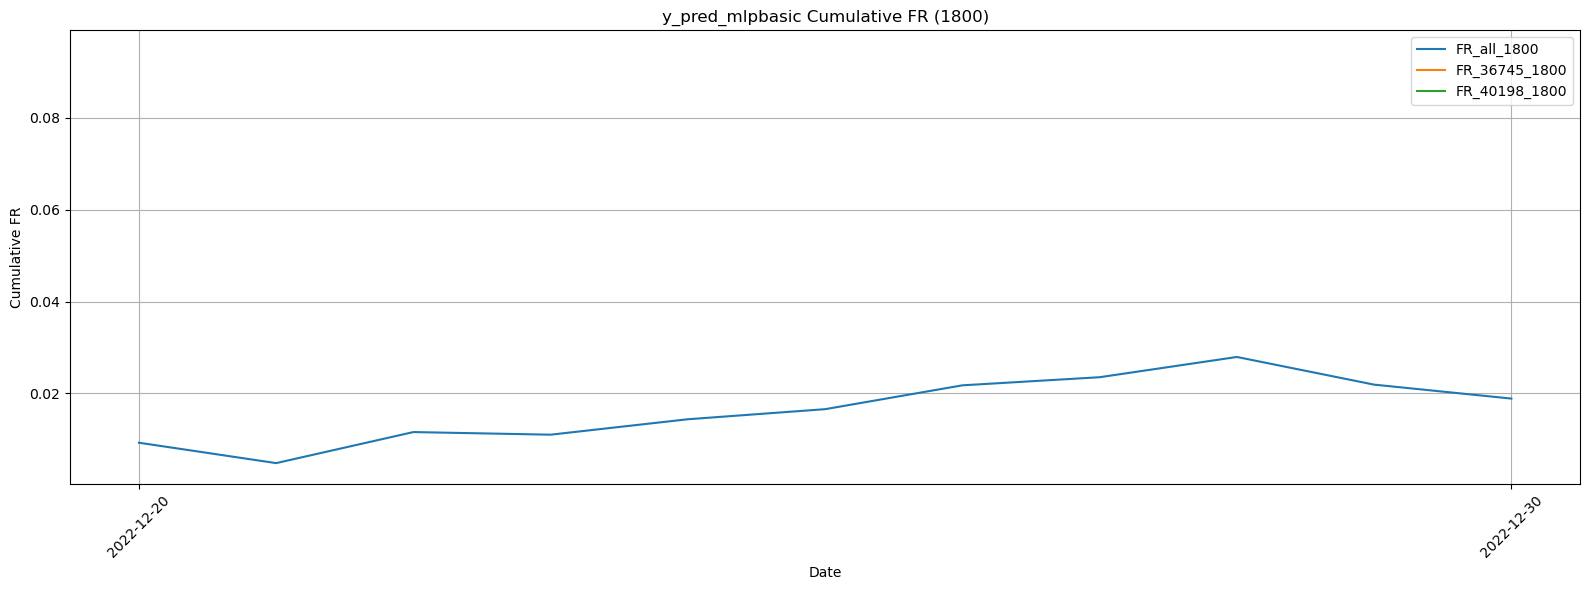

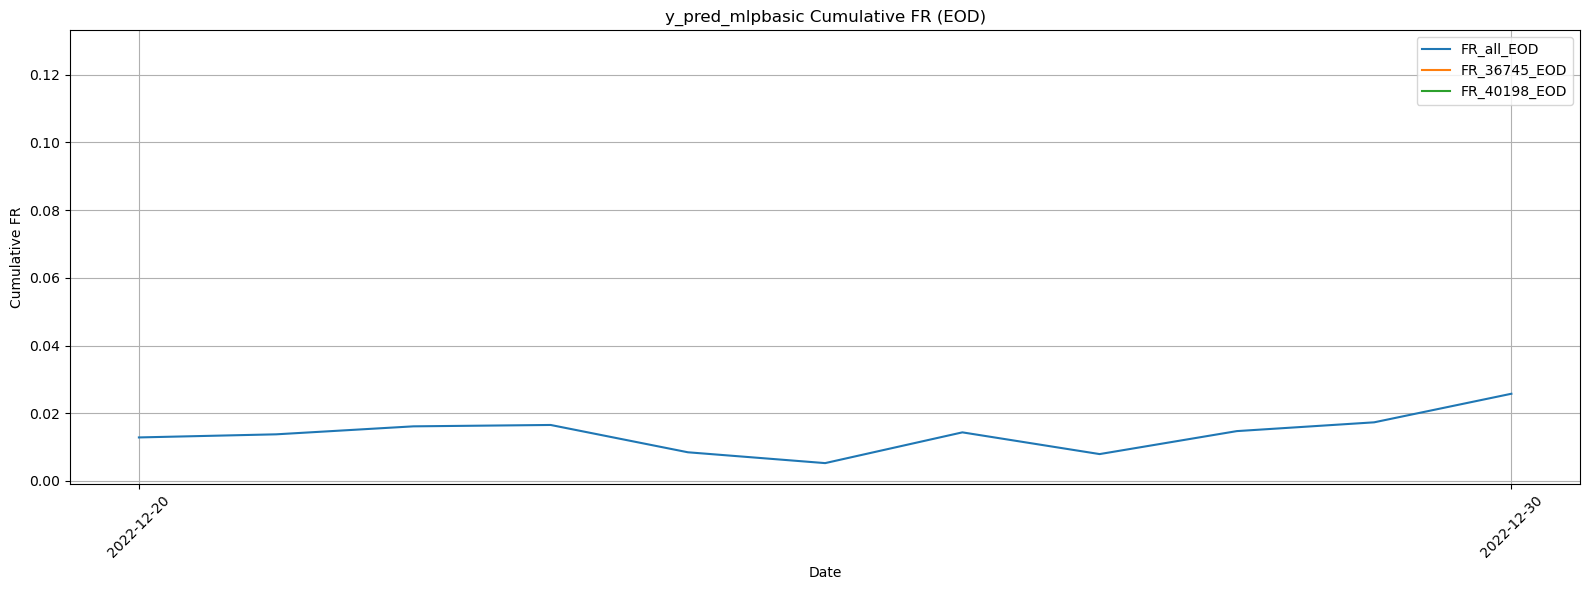

In [44]:
cumulative_fr_df = plot_fr_col(test_df,feat_col = 'y_pred_mlpbasic') # ret_cols=['1800_.HSI','EOD_.HSI']

In [113]:
## 3D NN


import torch
import torch.nn as nn
import numpy as np
import copy
from tqdm import tqdm
from torch.utils.data import DataLoader, TensorDataset, Subset
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.metrics import accuracy_score
from datetime import datetime


CFG = {
    'BATCH_SIZE': 64,
    'LEARN_RATE': 0.01,
    'WEIGHT_DECAY': 0.5,
    'DECAY_PATIENCE': 2,
    'EPOCH': 15,
    'PATIENCE': 4,
}

def df_to_4dnp(input_df, RIC_dim, TIME_dim, feature_dim):
    input_df['TIMEID'] = input_df.groupby(['DATE', 'RIC']).cumcount()
    factor_all_df = input_df.set_index(['RIC','DATE','TIMEID']).sort_index()
    # 获取维度索引
    ric_list = sorted(factor_all_df.index.get_level_values('RIC').unique())
    date_list = sorted(factor_all_df.index.get_level_values('DATE').unique())
    timeint_list = sorted(factor_all_df.index.get_level_values('TIMEID').unique())
    feature_list = factor_all_df.columns.tolist()

    # 建立索引映射
    ric_to_idx = {ric: i for i, ric in enumerate(ric_list)}
    date_to_idx = {date: i for i, date in enumerate(date_list)}
    timeint_to_idx = {t: i for i, t in enumerate(timeint_list)}

    # 初始化 4D 数组，默认填 NaN
    data_4d = np.full((len(date_list), RIC_dim, TIME_dim, feature_dim), np.nan)

    # 遍历填入
    for (ric, date, timeint), row in tqdm(factor_all_df.iterrows()):
        i = ric_to_idx[ric]
        j = date_to_idx[date]
        k = timeint_to_idx[timeint]
        data_4d[j, i, k, :] = row.values
    return data_4d

def mlp_train_basic(factor_all_df, trialcvmodel, features=None, target_str=None, pred_name=None):
    factor_all_df['DATETIME'] = pd.to_datetime(factor_all_df['DATE'], format='%Y-%m-%d')

    if features is None: 
        features = ['s1_a1_down_b1_down', 's1_a1_rise_amt_d_all', 's1_a1_up_b1_down', 's1_amt_ms', 's1_ask3_amt_pct',
                   's1_ask_pct', 's1_ave_ab_diff', 's1_b10da10_mean', 's1_b1_down_amt_d_all', 's1_bda1_rdd_amt',
                   's1_bda_med', 's1_bdatn_med', 's1_bid_p_std', 's1_bma_3_pct', 's1_bma_chg', 's1_corr_pt', 's1_corr_pv',
                   's1_dtb_d_a_std', 's1_dtb_d_amt', 's1_hl_t_diff', 's1_mid_up_mid3_v', 's1_near_btd_rate',
                   's1_px_chg_abs_sum', 's1_px_chg_skew', 's1_px_chg_std', 's1_px_up_ma5', 's1_rise_vwap', 's1_ta_d_a',
                   's1_vdt', 's1_vwap_up_lastmid', 's1_vwap_up_mid', 's1_vwap_up_mid3_v', 's5_a1_rise_amt_d_all',
                   's5_amt_compare', 's5_amt_max_pct', 's5_a_sk3_amt_pct', 's5_ask_10d3_d1', 's5_ask_10d3_max',
                   's5_b10da10_mean', 's5_b1d10_up_ask10_down', 's5_bid_p_std', 's5_hl1_d4', 's5_high2last',
                   's5_last_avea_corr', 's5_low2last', 's5_max5_rise_sum', 's5_mid_up_mid3_v', 's5_near_btd3_rate',
                   's5_near_btd_rate', 's5_pct_chg_max', 's5_pct_ud', 's5_px_chg_abs_sum', 's5_px_chg_skew', 's5_px_chg_std',
                   's5_rise_vwap', 's5_rise_wap', 's5_rise_wapd_ms', 's5_v2hl_std', 's5_v5vdv', 's5_vol_d_ab10_diff',
                   's5_vol_d_corr', 's5_vw_pct', 's5_vw_px_vwap_diff', 's5_vwap_1d5', 's5_warm_rise', 's_ask_pct',
                   's_b1_down_amt_d_all', 's_bda1_rdd_amt_rate', 's_bid3_amt_pct', 's_bma_3_pct', 's_cavity',
                   's_et_rd_num_diff', 's_high2last', 's_high_when', 's_hspread_rise', 's_low2last', 's_low_when',
                   's_max_draw', 's_mid_up_mid3_v', 's_price2b', 's_price2wap', 's_price2wap_mean', 's_real_pct',
                   's_spread_1d5', 's_std_ud', 's_trigger_time', 's_vexity', 's_vw_av_pct_diff', 's_vw_pct',
                   's_vw_px_vwap_diff', 's_vwap_up_lastmid3_v', 's_vwap_up_mid', 's_vwap_up_mid3'] 

    factor_all_df['target'] =  (factor_all_df[target_str]) if target_str is not None else (factor_all_df['1800'])
    
    pred_name = 'y_pred' if pred_name is None else pred_name
    # # 划分训练集和测试集
    train_start = datetime(2022, 12, 1)
    train_end = datetime(2022, 12, 20)
    test_start = datetime(2022, 12, 20) 
    test_end = datetime(2022, 12, 31)



    RIC_dim = (factor_all_df.index.get_level_values('RIC').nunique())
    TIME_dim = (factor_all_df.index.get_level_values('DATE').nunique())
    feature_dim = len(factor_all_df.columns)

    train_df = factor_all_df[(factor_all_df['DATETIME'] >= train_start) & (factor_all_df['DATETIME'] < train_end)]
    test_df = factor_all_df[(factor_all_df['DATETIME'] >= test_start) & (factor_all_df['DATETIME'] < test_end)]


    X_train = df_to_4dnp(train_df[features], RIC_dim, TIME_dim, feature_dim)
    y_train_open = train_df['target']

    X_test = df_to_4dnp(test_df[features])
    y_test_open = test_df['target']
    
    def predict_NN(X, model): 
        X_pred_tensor = torch.tensor(X.values, dtype=torch.float32)
        dataset = TensorDataset(X_pred_tensor) 
        pred_loader = DataLoader(dataset, batch_size=CFG['BATCH_SIZE'], shuffle=False)
        model.eval()
        predictions = []
        with torch.no_grad():
            for inputs in tqdm(pred_loader):
                outputs = model(inputs[0])
                preds = outputs.squeeze().tolist()
                predictions.extend(preds) # todo
        return np.array(predictions, dtype=np.float32)

    
    # 训练 return_open 模型
    model_open = trialcvmodel
    pred_open_train = predict_NN(X_train, model_open)
    pred_open_test = predict_NN(X_test, model_open)
    

    # 在测试集上应用预测结果
    train_df[pred_name] = (pred_open_train)
    test_df[pred_name]  = (pred_open_test)
    
    return model_open, test_df, train_df



In [ ]:

import random
random_seed = 42
torch.manual_seed(random_seed)
np.random.seed(random_seed)
random.seed(random_seed)



# 定义训练函数
def train_model(model, criterion, optimizer, scheduler, dataloaders, num_epochs=25, early_stopping_patience=5):
    best_model = copy.deepcopy(model)
    best_loss = float('inf')
    epochs_no_improve = 0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)
        
        train_loss = 0.0
        val_loss = 0.0
        
        # 每个epoch都有一个训练和验证阶段
        if early_stopping_patience == -1:
            mode_train = ['train']
        else:
            mode_train = ['train', 'val']
        for phase in mode_train:
            if phase == 'train':
                model.train()  # 设置模型为训练模式
            else:
                model.eval()  # 设置模型为评估模式
            running_loss = 0.0


            # 迭代数据
            for inputs, labels in tqdm(dataloaders[phase]):
                optimizer.zero_grad()  # 梯度清零
                # 前向传播
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    # 反向传播+优化仅在训练阶段进行
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # 统计
                running_loss += loss.item() * inputs.size(0)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)


            #在验证阶段调整学习率
            if phase == 'train':
                train_loss = epoch_loss
            if phase == 'val':
                val_loss = epoch_loss
                scheduler.step(epoch_loss)
                #深拷贝模型
                if round(epoch_loss, 5) < round(best_loss, 5):
                    best_loss=epoch_loss
                    best_model = copy.deepcopy(model)
                    epochs_no_improve=0
                else:    
                    epochs_no_improve +=1
                    if epochs_no_improve == early_stopping_patience:
                        print('Early stopping')
                        return model, best_model
            
        lr = optimizer.param_groups[0]['lr']
        print(f'epoch {epoch+1} finished: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, LR: {lr}')
    return model, best_model


In [ ]:
target_str='1800'
pred_name='y_pred_mlp'

factor_all_df = table.df.reset_index()
factor_all_df['DATETIME'] = pd.to_datetime(factor_all_df['DATE'], format='%Y-%m-%d')

if features is None: 
    features = ['s1_a1_down_b1_down', 's1_a1_rise_amt_d_all', 's1_a1_up_b1_down', 's1_amt_ms', 's1_ask3_amt_pct',
                's1_ask_pct', 's1_ave_ab_diff', 's1_b10da10_mean', 's1_b1_down_amt_d_all', 's1_bda1_rdd_amt',
                's1_bda_med', 's1_bdatn_med', 's1_bid_p_std', 's1_bma_3_pct', 's1_bma_chg', 's1_corr_pt', 's1_corr_pv',
                's1_dtb_d_a_std', 's1_dtb_d_amt', 's1_hl_t_diff', 's1_mid_up_mid3_v', 's1_near_btd_rate',
                's1_px_chg_abs_sum', 's1_px_chg_skew', 's1_px_chg_std', 's1_px_up_ma5', 's1_rise_vwap', 's1_ta_d_a',
                's1_vdt', 's1_vwap_up_lastmid', 's1_vwap_up_mid', 's1_vwap_up_mid3_v', 's5_a1_rise_amt_d_all',
                's5_amt_compare', 's5_amt_max_pct', 's5_a_sk3_amt_pct', 's5_ask_10d3_d1', 's5_ask_10d3_max',
                's5_b10da10_mean', 's5_b1d10_up_ask10_down', 's5_bid_p_std', 's5_hl1_d4', 's5_high2last',
                's5_last_avea_corr', 's5_low2last', 's5_max5_rise_sum', 's5_mid_up_mid3_v', 's5_near_btd3_rate',
                's5_near_btd_rate', 's5_pct_chg_max', 's5_pct_ud', 's5_px_chg_abs_sum', 's5_px_chg_skew', 's5_px_chg_std',
                's5_rise_vwap', 's5_rise_wap', 's5_rise_wapd_ms', 's5_v2hl_std', 's5_v5vdv', 's5_vol_d_ab10_diff',
                's5_vol_d_corr', 's5_vw_pct', 's5_vw_px_vwap_diff', 's5_vwap_1d5', 's5_warm_rise', 's_ask_pct',
                's_b1_down_amt_d_all', 's_bda1_rdd_amt_rate', 's_bid3_amt_pct', 's_bma_3_pct', 's_cavity',
                's_et_rd_num_diff', 's_high2last', 's_high_when', 's_hspread_rise', 's_low2last', 's_low_when',
                's_max_draw', 's_mid_up_mid3_v', 's_price2b', 's_price2wap', 's_price2wap_mean', 's_real_pct',
                's_spread_1d5', 's_std_ud', 's_trigger_time', 's_vexity', 's_vw_av_pct_diff', 's_vw_pct',
                's_vw_px_vwap_diff', 's_vwap_up_lastmid3_v', 's_vwap_up_mid', 's_vwap_up_mid3'] 

factor_all_df['target'] =  (factor_all_df[target_str]) if target_str is not None else (factor_all_df['1800'])

pred_name = 'y_pred' if pred_name is None else pred_name
# # 划分训练集和测试集
train_start = datetime(2022, 12, 1)
train_end = datetime(2022, 12, 14)
test_start = datetime(2022, 12, 15) 
test_end = datetime(2022, 12, 20)



RIC_dim = (factor_all_df.index.get_level_values('RIC').nunique())
TIME_dim = (factor_all_df.index.get_level_values('DATE').nunique())
feature_dim = len(factor_all_df.columns)

train_df = factor_all_df[(factor_all_df['DATETIME'] >= train_start) & (factor_all_df['DATETIME'] < train_end)]
test_df = factor_all_df[(factor_all_df['DATETIME'] >= test_start) & (factor_all_df['DATETIME'] < test_end)]


X_train = df_to_4dnp(train_df[features], RIC_dim, TIME_dim, feature_dim)
y_train_open = df_to_4dnp(train_df[[features]], RIC_dim, TIME_dim, 1)

X_test = df_to_4dnp(test_df[features])
y_test_open = df_to_4dnp(test_df[[features]], RIC_dim, TIME_dim, 1)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_open.values, dtype=torch.float32).view(-1, 1)
dataset = TensorDataset(X_train_tensor, y_train_tensor)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_open.values, dtype=torch.float32).view(-1, 1)
dataset_test = TensorDataset(X_test_tensor, y_test_tensor)


train_loader = DataLoader(dataset, batch_size=CFG['BATCH_SIZE'], shuffle=False)
val_loader = DataLoader(dataset_test, batch_size=CFG['BATCH_SIZE'], shuffle=False)
dataloaders = {'train': train_loader, 'val': val_loader}


class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(len(features), 32)
        self.batch_norm1 = nn.BatchNorm1d(32)
        self.dropout1 = nn.Dropout(0.5)  
        self.layer2 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.layer1(x)
        x = self.batch_norm1(x)
        x = self.relu(x)
        x = self.dropout1(x)
        x = self.layer2(x)
        return x

model = SimpleNN()
optimizer = torch.optim.AdamW(model.parameters(), lr=CFG['LEARN_RATE'])
criterion = nn.MSELoss()
scheduler = ReduceLROnPlateau(optimizer, 'min', patience=CFG['DECAY_PATIENCE'], factor=CFG['WEIGHT_DECAY'], verbose=True)


_, trialcvmodel = train_model(model,
                    criterion,
                    optimizer,
                    scheduler,
                    dataloaders,
                    num_epochs=CFG['EPOCH'],
                    early_stopping_patience=CFG['PATIENCE'])

Epoch 1/15
----------


100%|██████████| 2079/2079 [00:01<00:00, 1682.67it/s]


epoch 1 finished: Train Loss: 1.0057, Val Loss: 1.0001, LR: 0.01
Epoch 2/15
----------


100%|██████████| 2079/2079 [00:01<00:00, 1631.58it/s]


epoch 2 finished: Train Loss: 1.0044, Val Loss: 1.0001, LR: 0.01
Epoch 3/15
----------


100%|██████████| 2079/2079 [00:01<00:00, 1615.80it/s]


epoch 3 finished: Train Loss: 1.0044, Val Loss: 1.0001, LR: 0.01
Epoch 4/15
----------


100%|██████████| 2079/2079 [00:01<00:00, 1696.05it/s]


Epoch 00004: reducing learning rate of group 0 to 5.0000e-03.
epoch 4 finished: Train Loss: 1.0044, Val Loss: 1.0001, LR: 0.005
Epoch 5/15
----------


100%|██████████| 2079/2079 [00:01<00:00, 1701.30it/s]

Early stopping


In [ ]:
_, test_df, train_df = mlp_train_basic(table.df.reset_index(), trialcvmodel, pred_name='y_pred_mlpbasic')

100%|██████████| 4572/4572 [00:01<00:00, 3572.50it/s]
C:\Users\HOMON\AppData\Local\Temp\ipykernel_19576\1953215087.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[pred_name] = (pred_open_train)
C:\Users\HOMON\AppData\Local\Temp\ipykernel_19576\1953215087.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[pred_name]  = (pred_open_test)


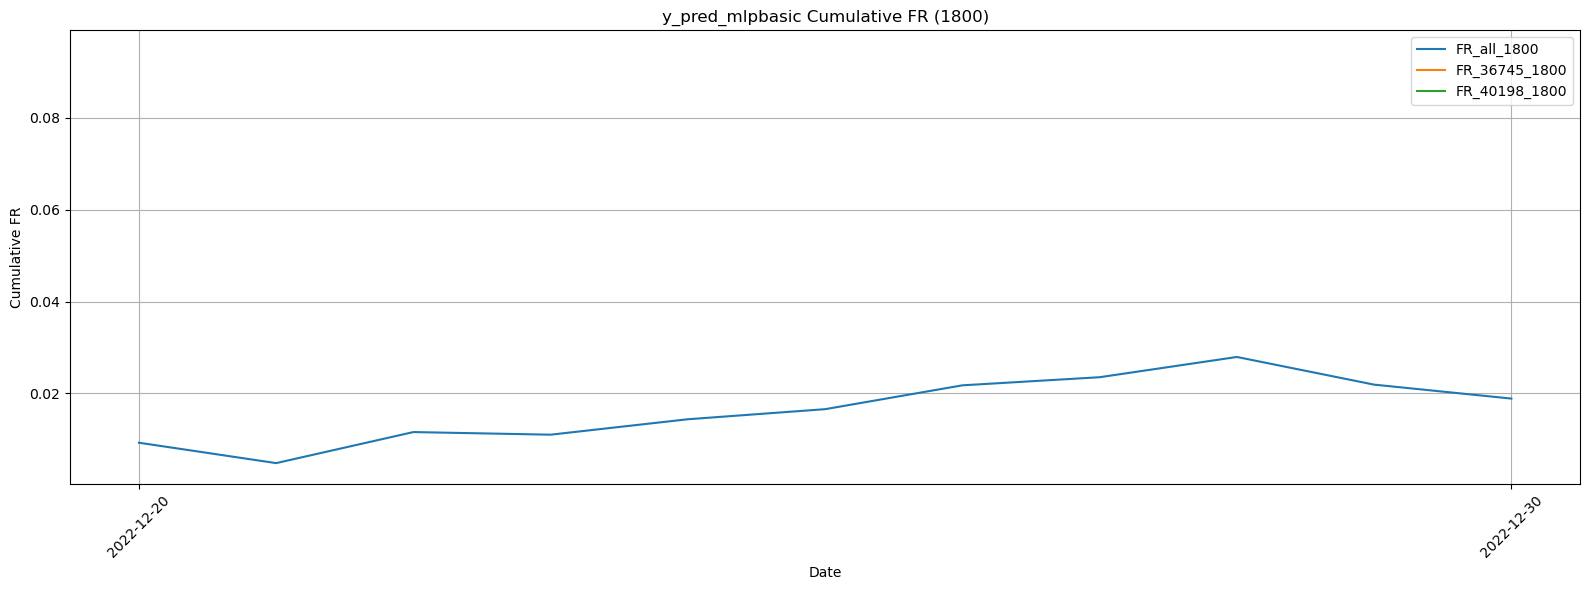

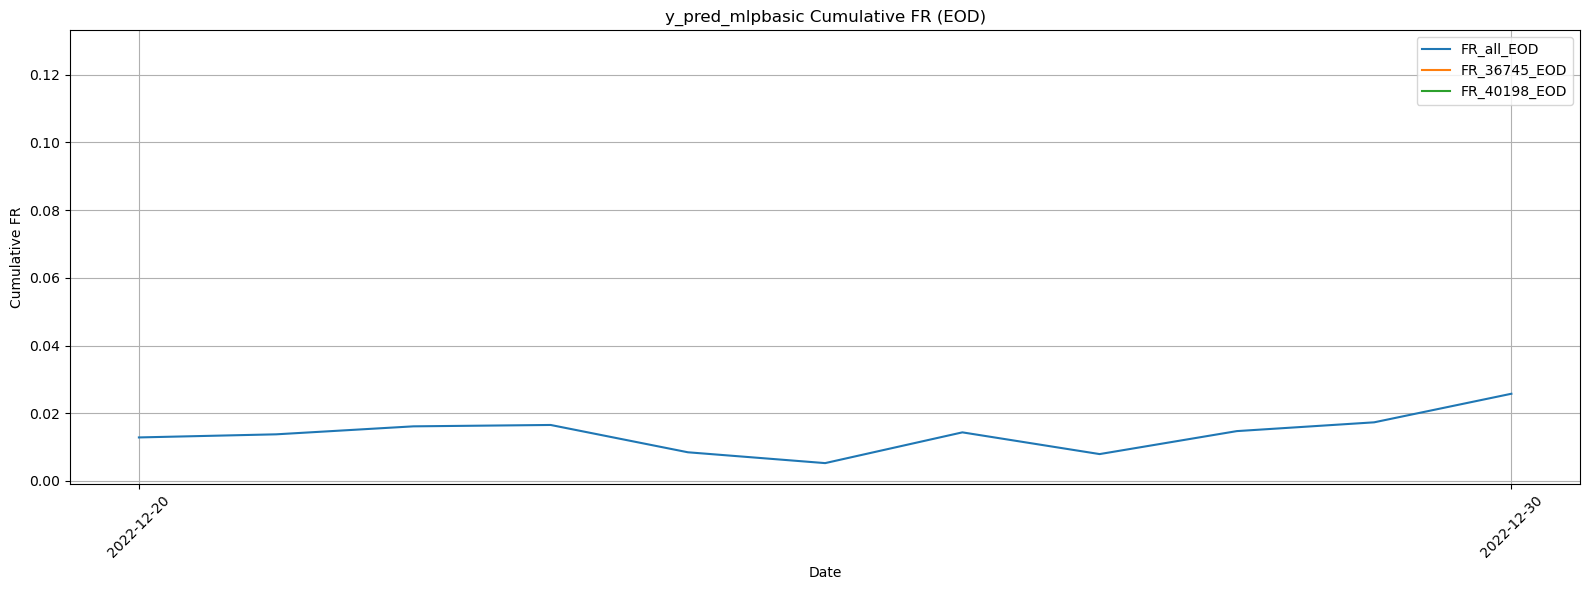

In [ ]:
cumulative_fr_df = plot_fr_col(test_df,feat_col = 'y_pred_mlpbasic') # ret_cols=['1800_.HSI','EOD_.HSI']